**Nama : Deni Andriansyah**<br>
**NIM : 211351040**<br>
**Kelas : Pagi B**<br>

# import dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"deniandriansyah","key":"edcee0e103543a013691875eb619ab53"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d thedevastator/cancer-patients-and-air-pollution-a-new-link

  0% 0.00/7.36k [00:00<?, ?B/s]
100% 7.36k/7.36k [00:00<00:00, 9.46MB/s]


In [4]:
!mkdir cancer-patients-and-air-pollution-a-new-link
!unzip cancer-patients-and-air-pollution-a-new-link.zip -d cancer-patients-and-air-pollution-a-new-link
!ls cancer-patients-and-air-pollution-a-new-link

Archive:  cancer-patients-and-air-pollution-a-new-link.zip
  inflating: cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv  
'cancer patient data sets.csv'


# import library yang digunakan

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Data discovery

In [6]:
df = pd.read_csv('/content/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv')

In [7]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [9]:
df.sample()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
270,270,P341,24,2,1,2,2,3,2,4,...,1,1,1,2,3,4,5,2,1,Low


In [10]:
df['Level'].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

In [11]:
df.isna().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

# EDA

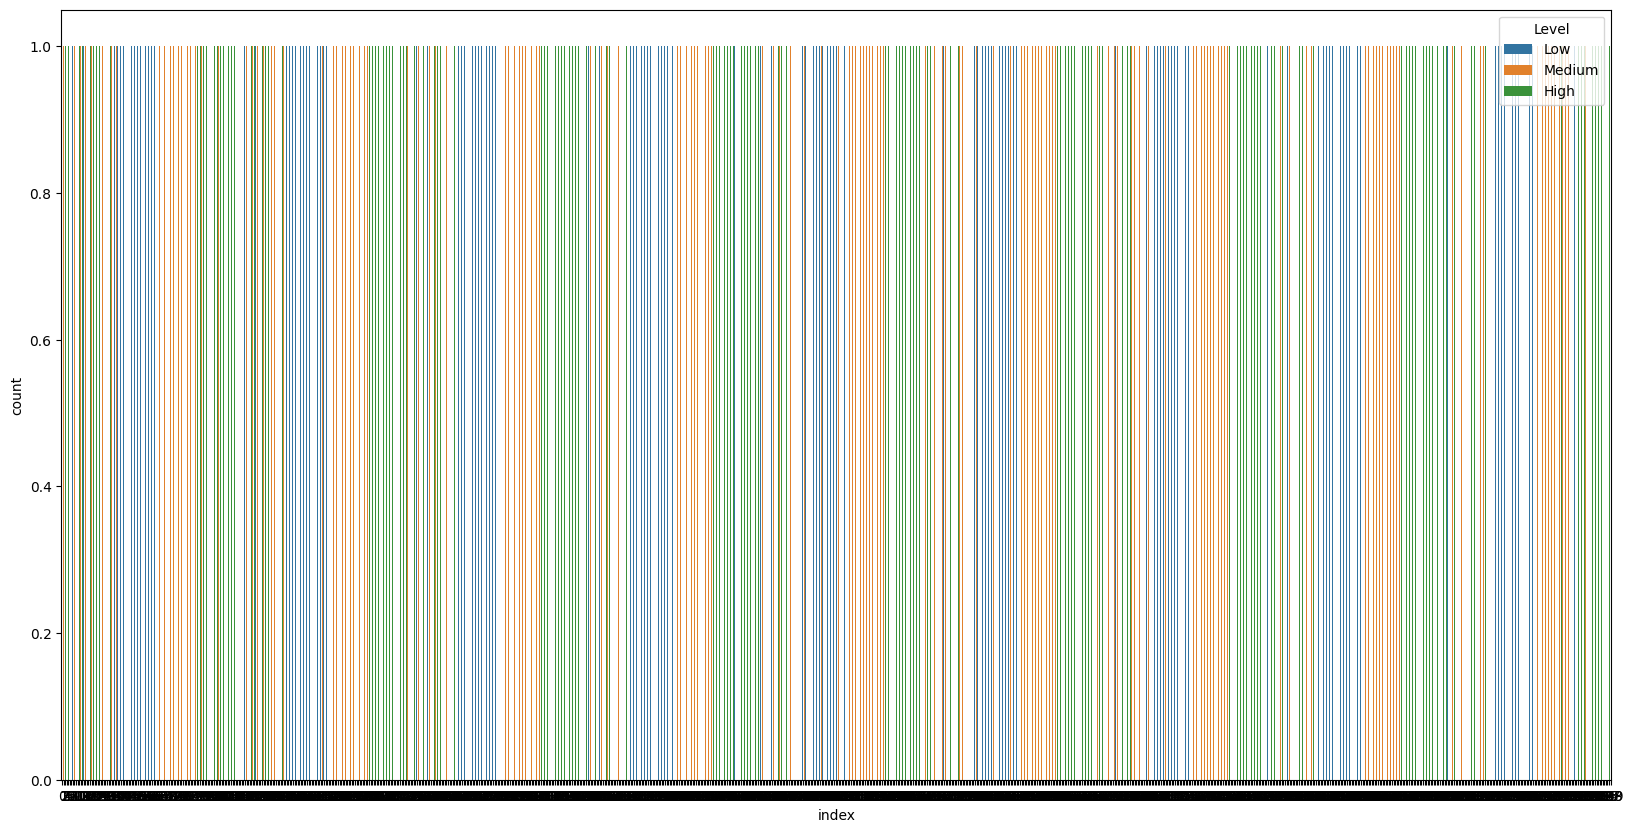

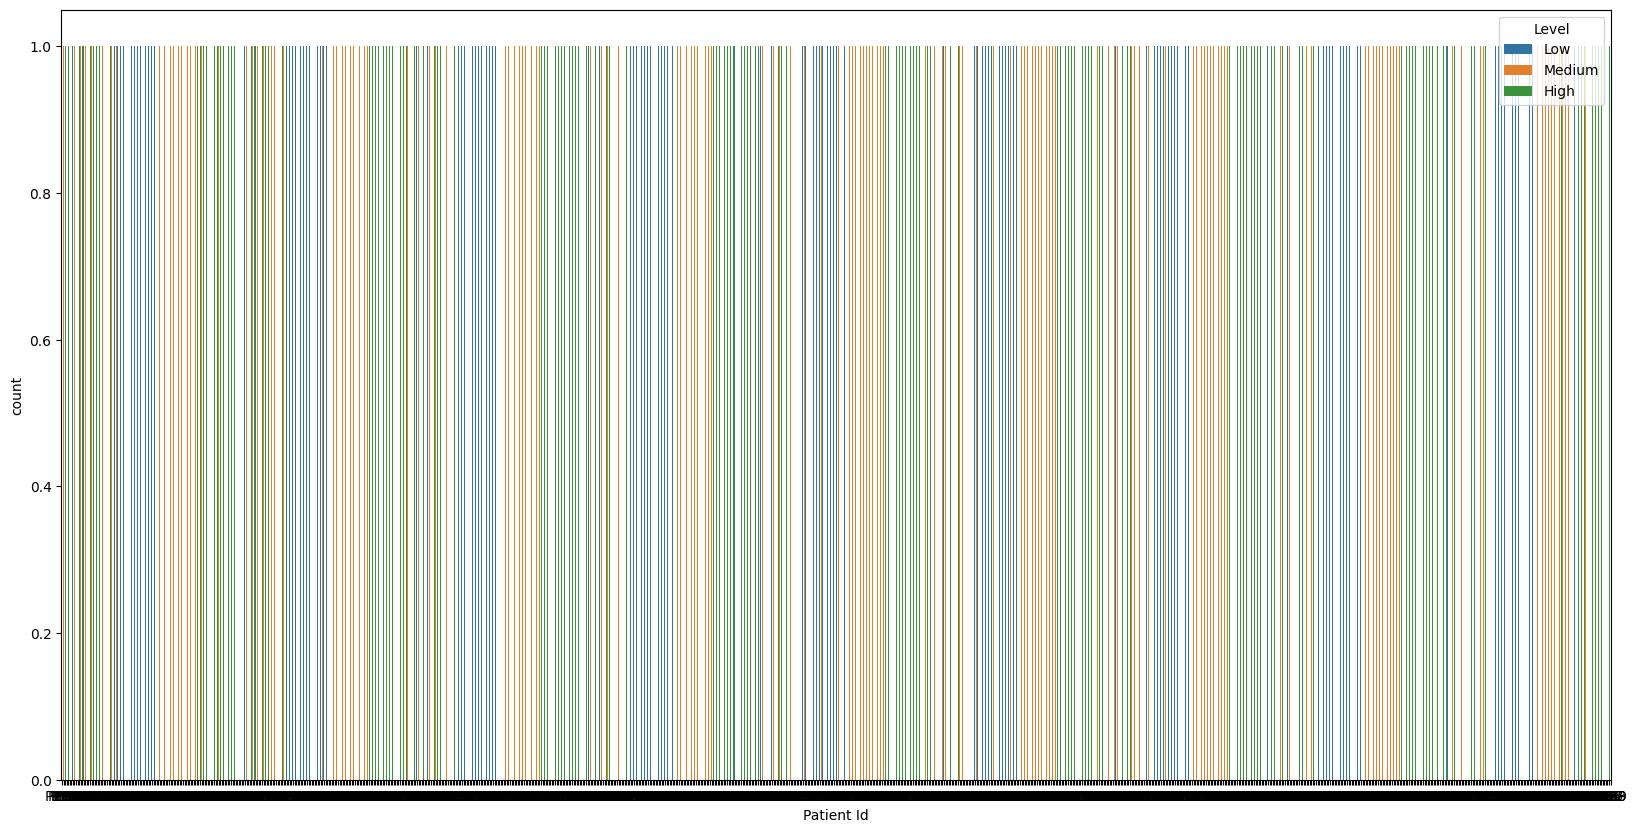

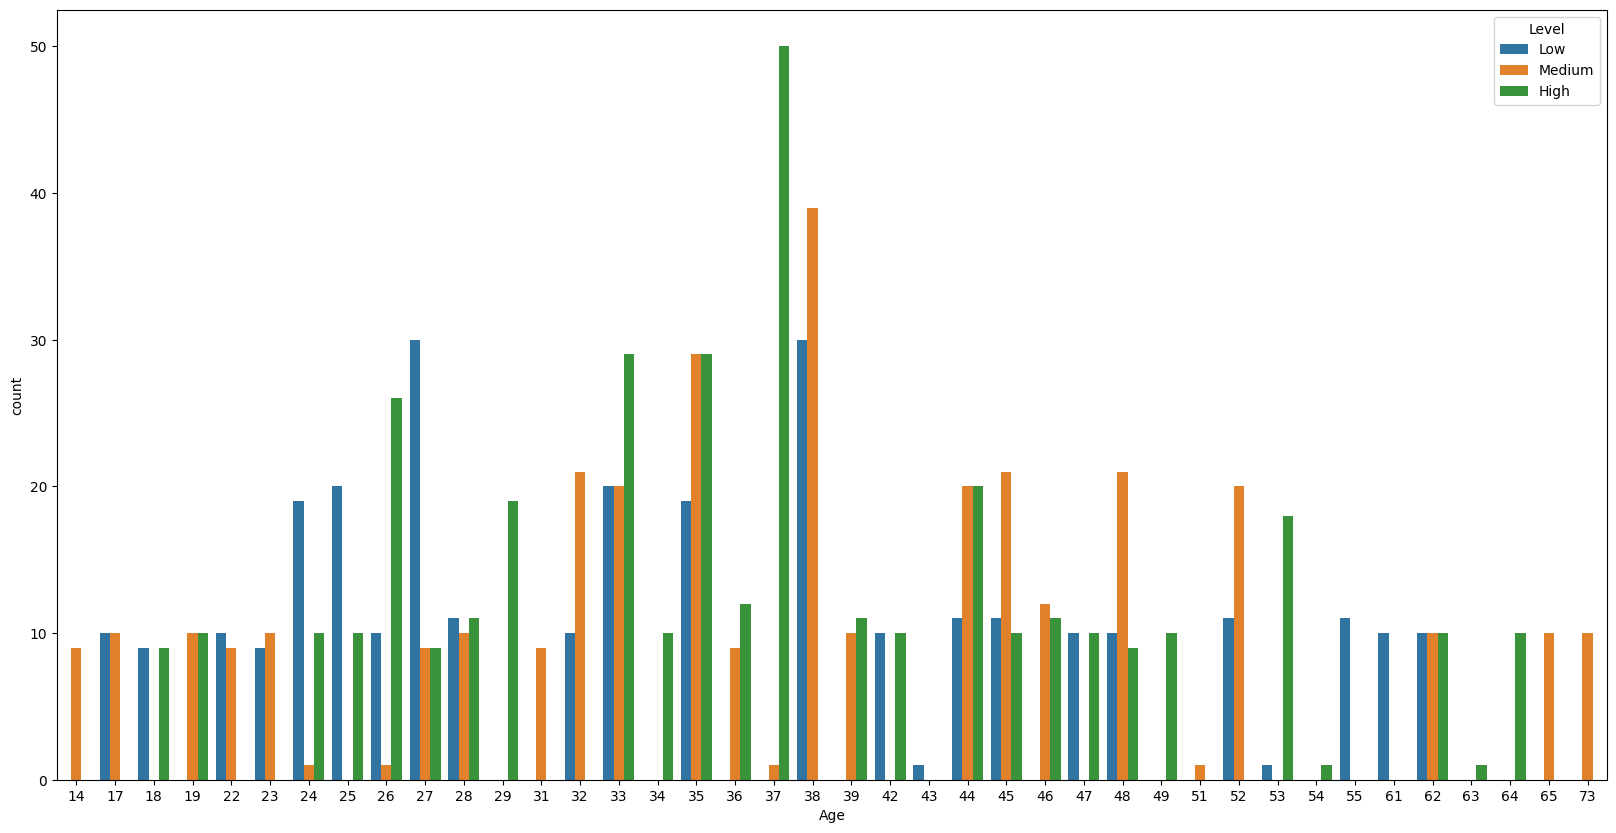

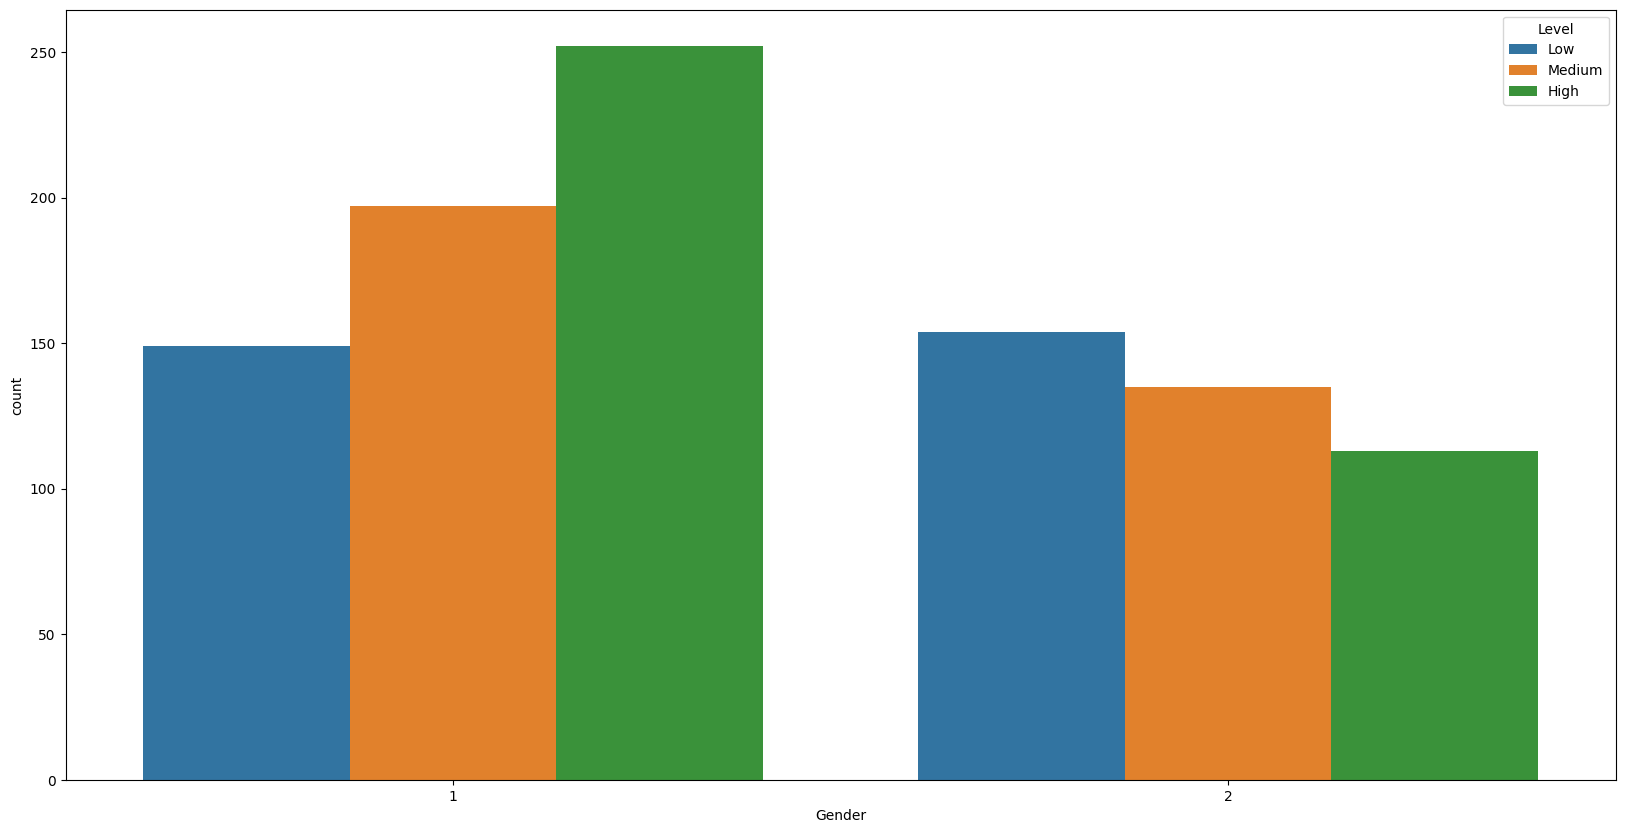

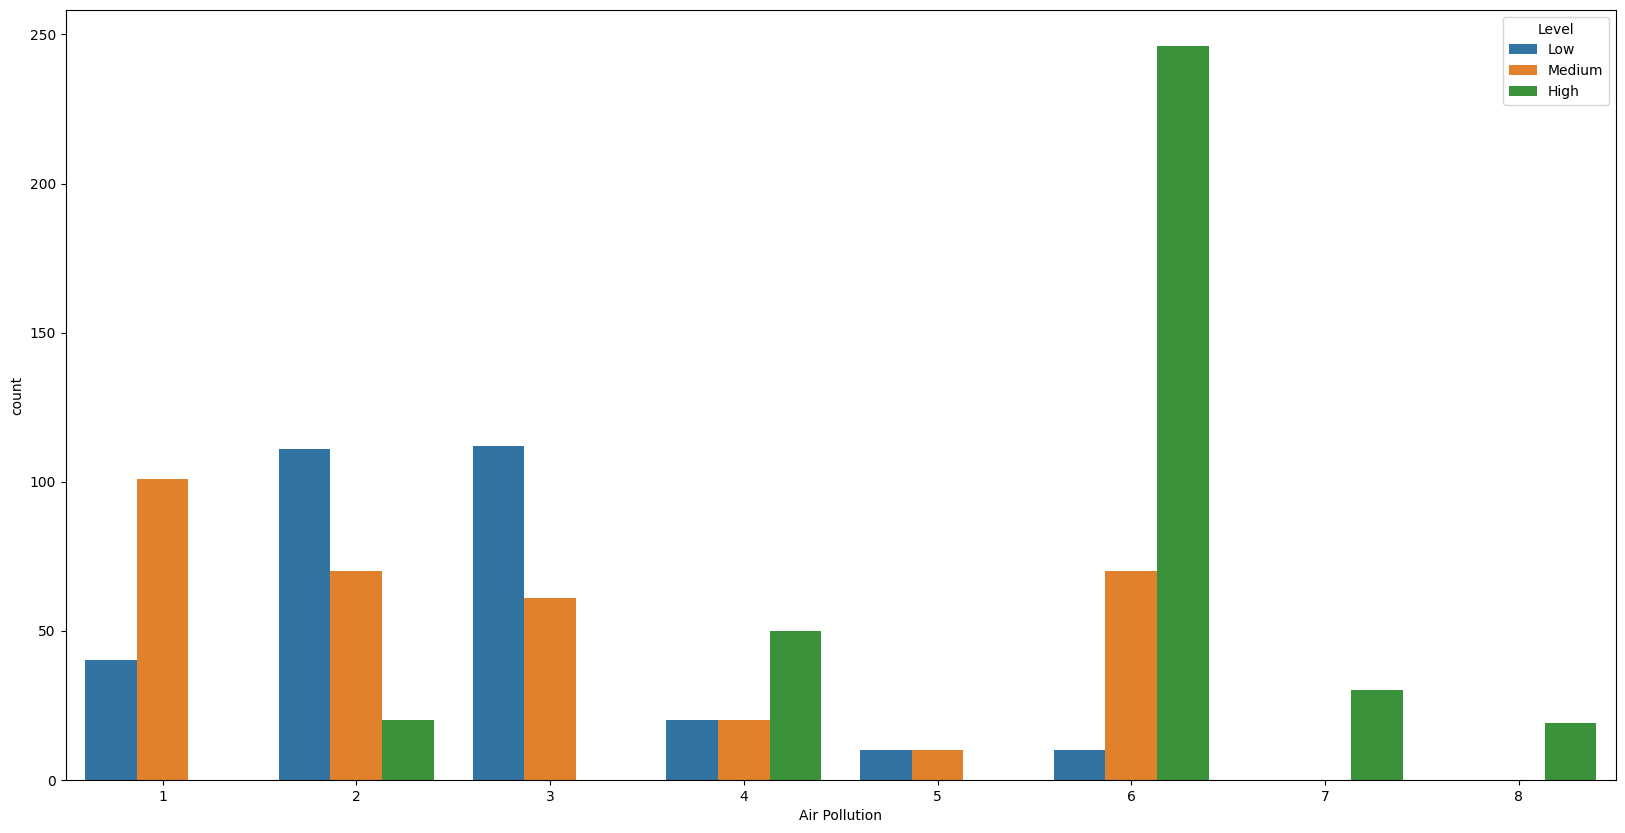

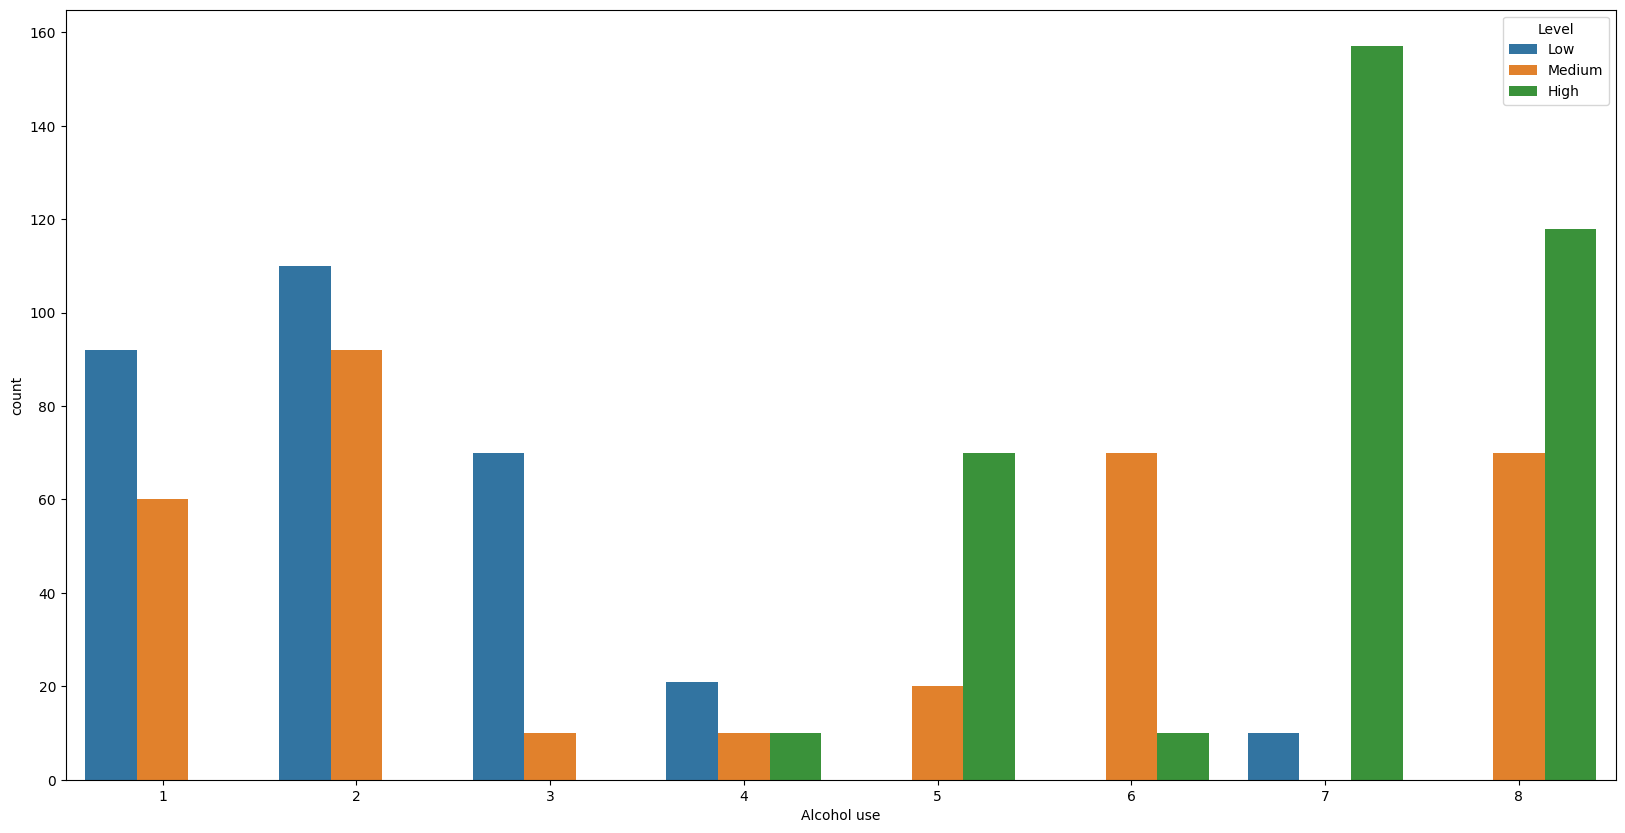

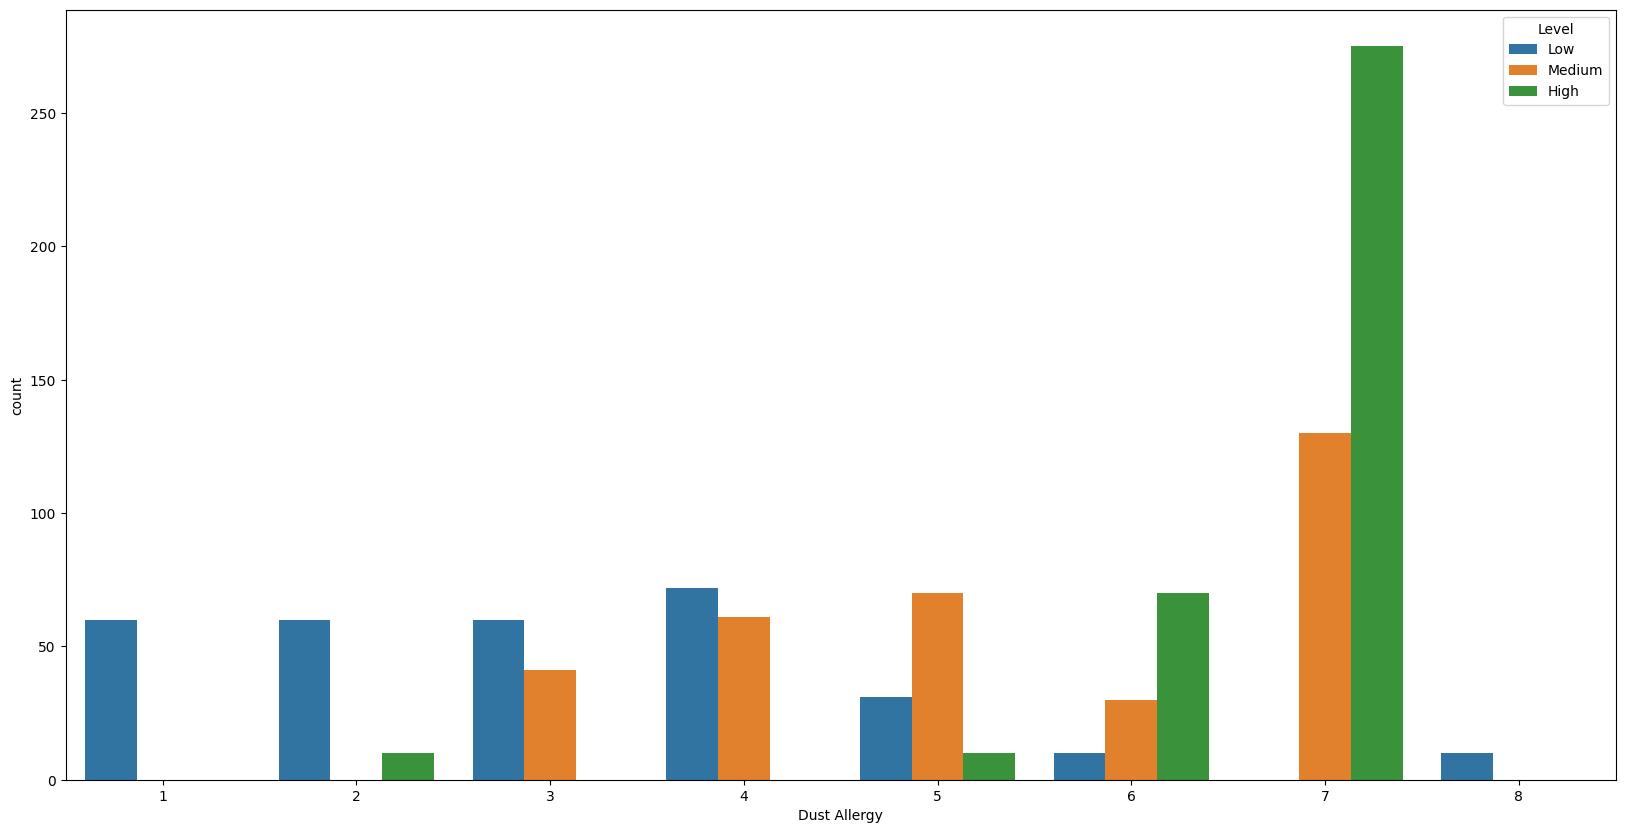

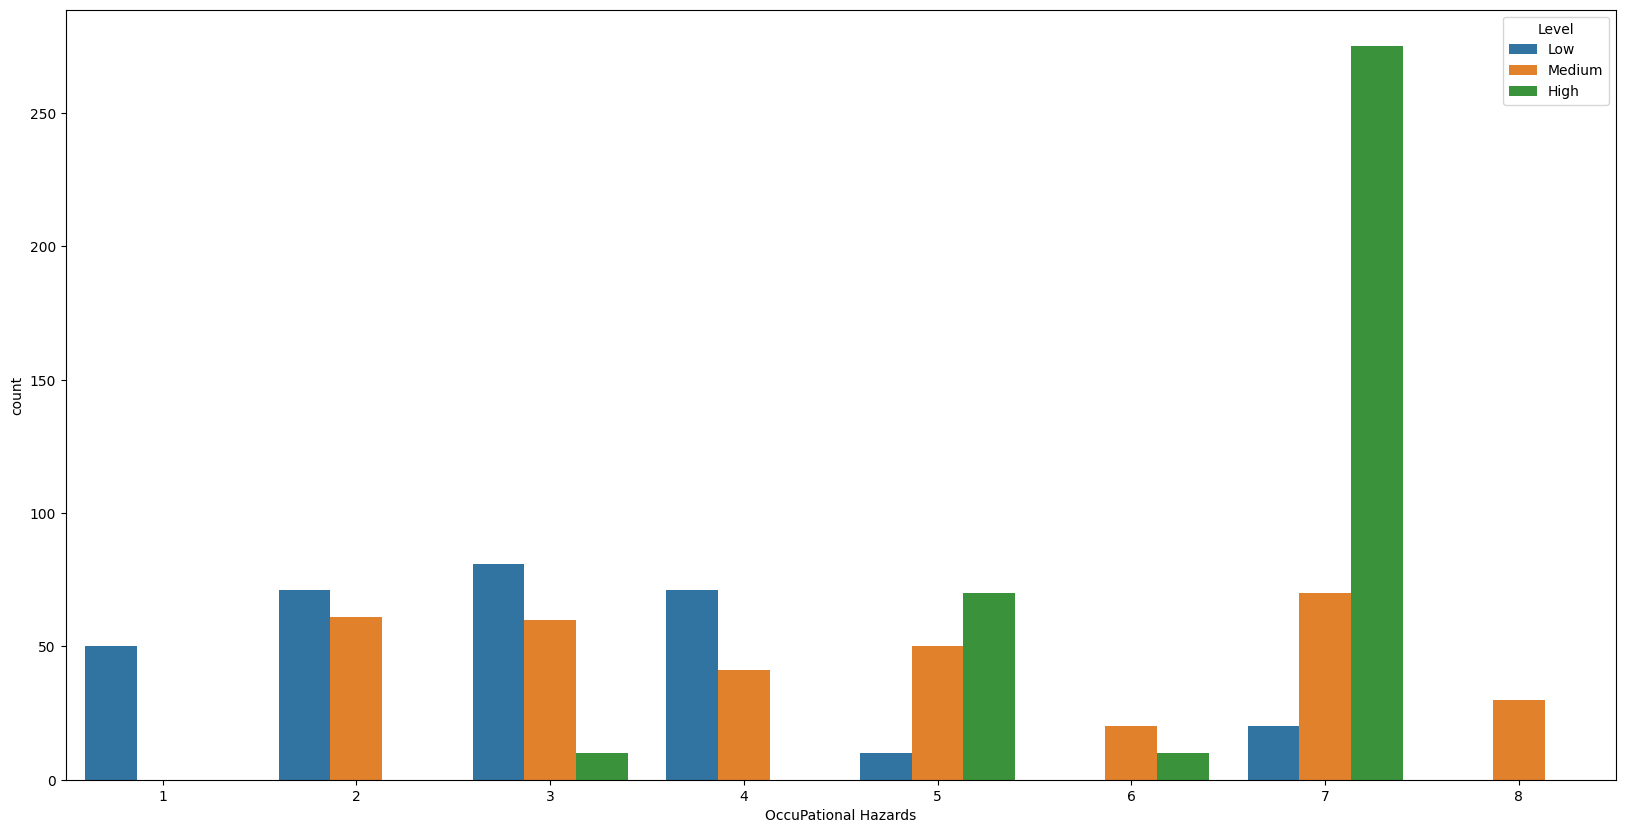

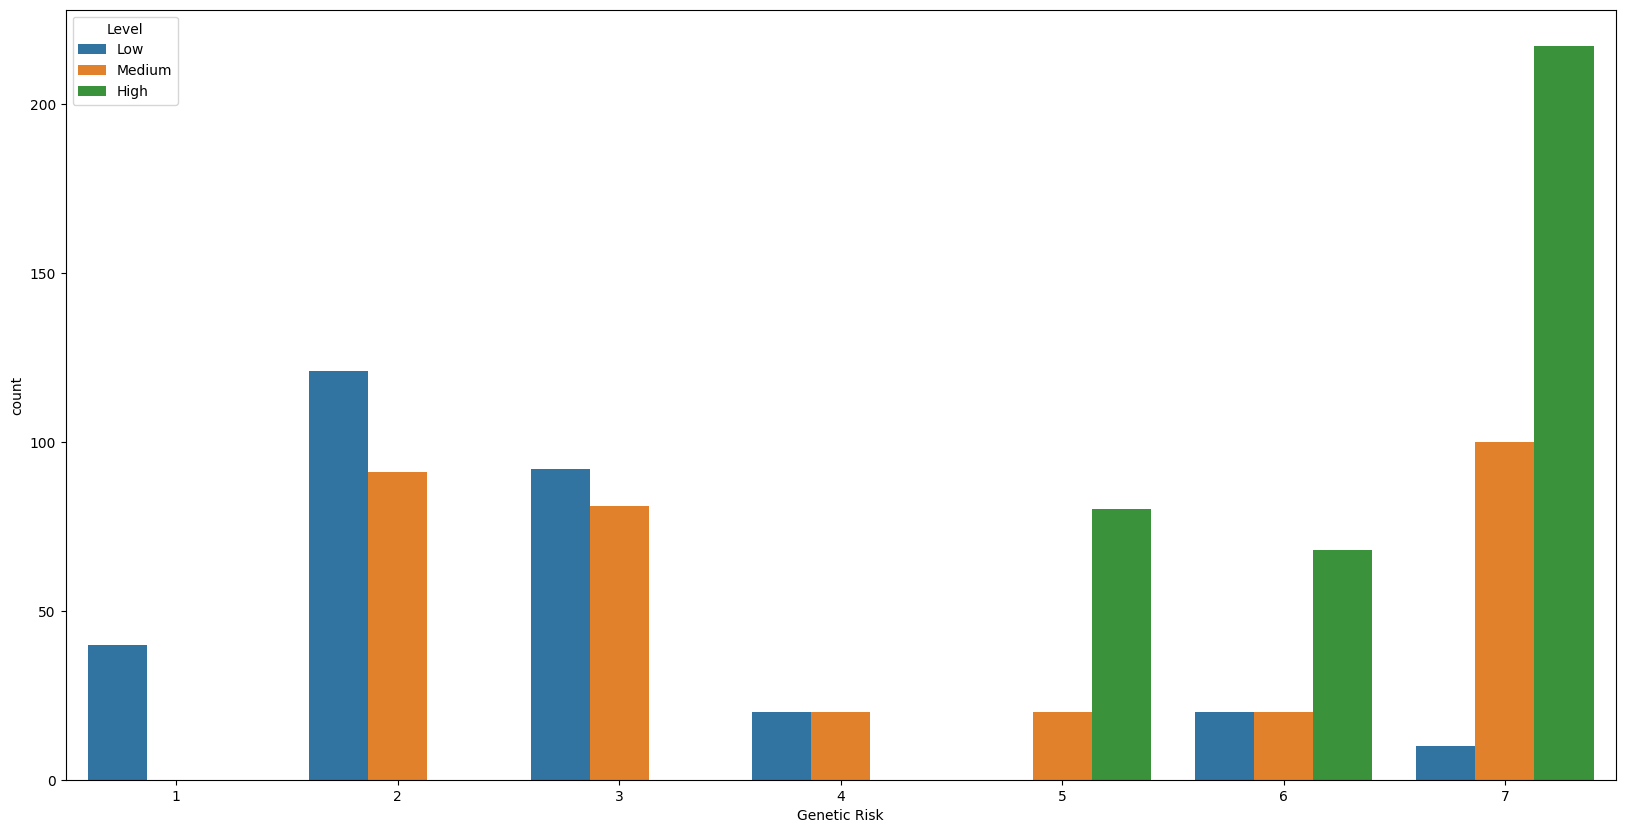

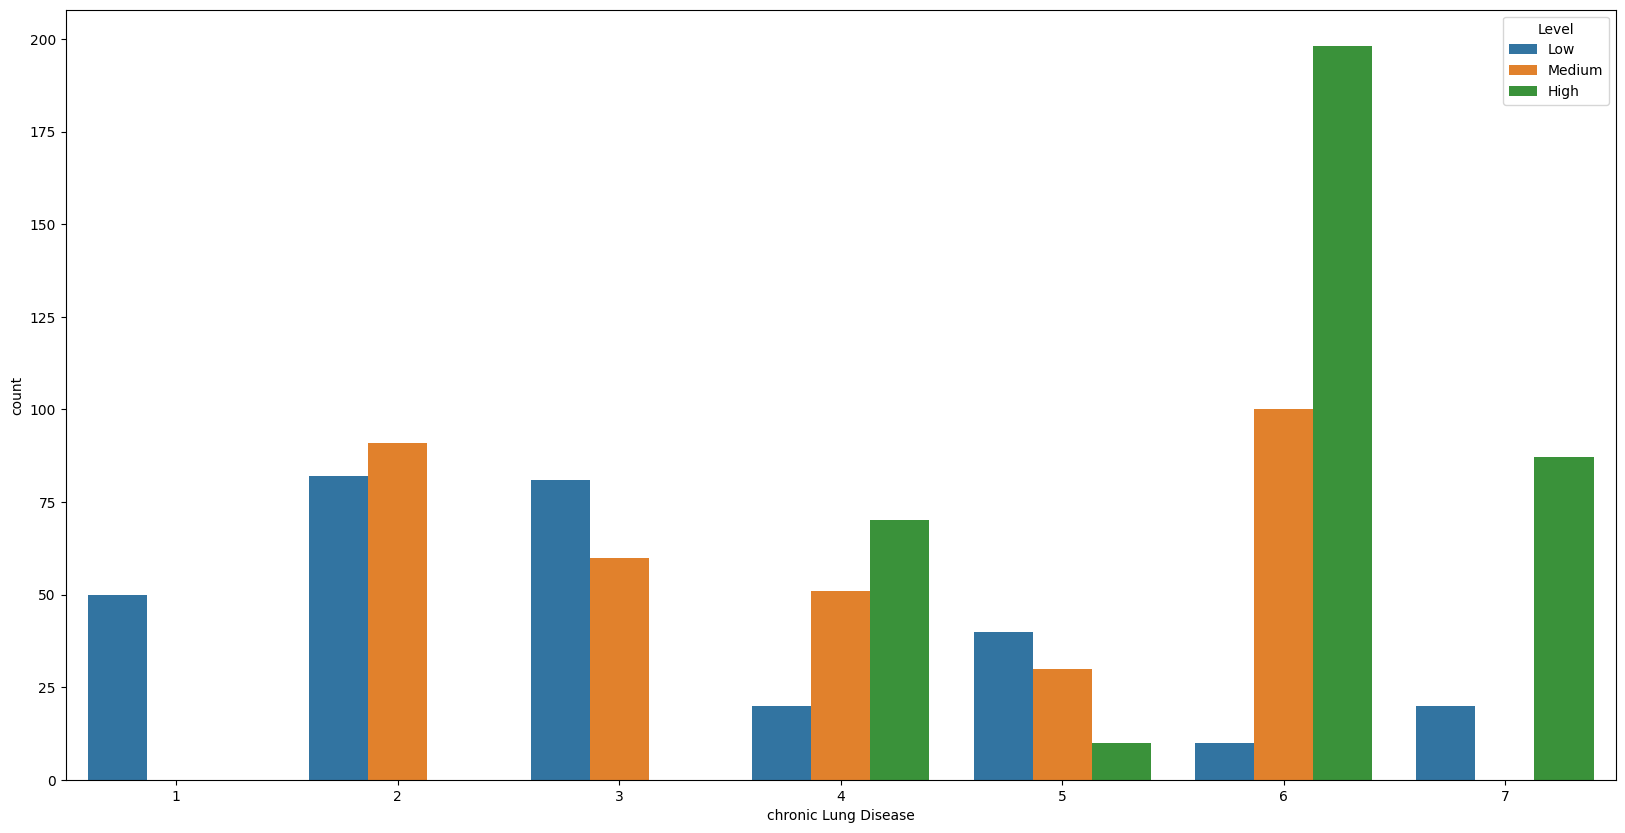

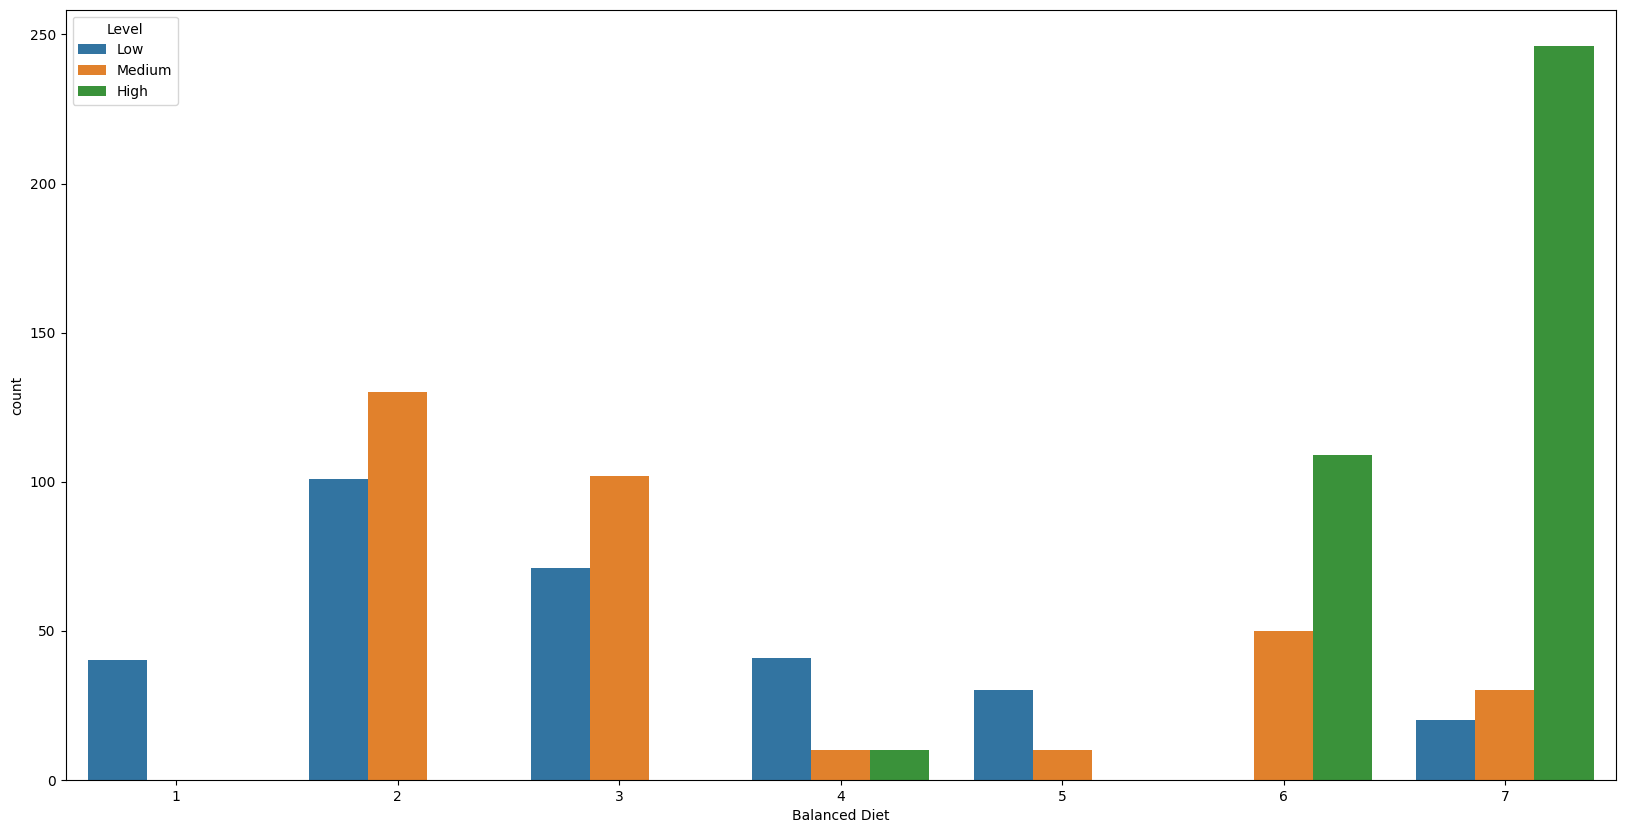

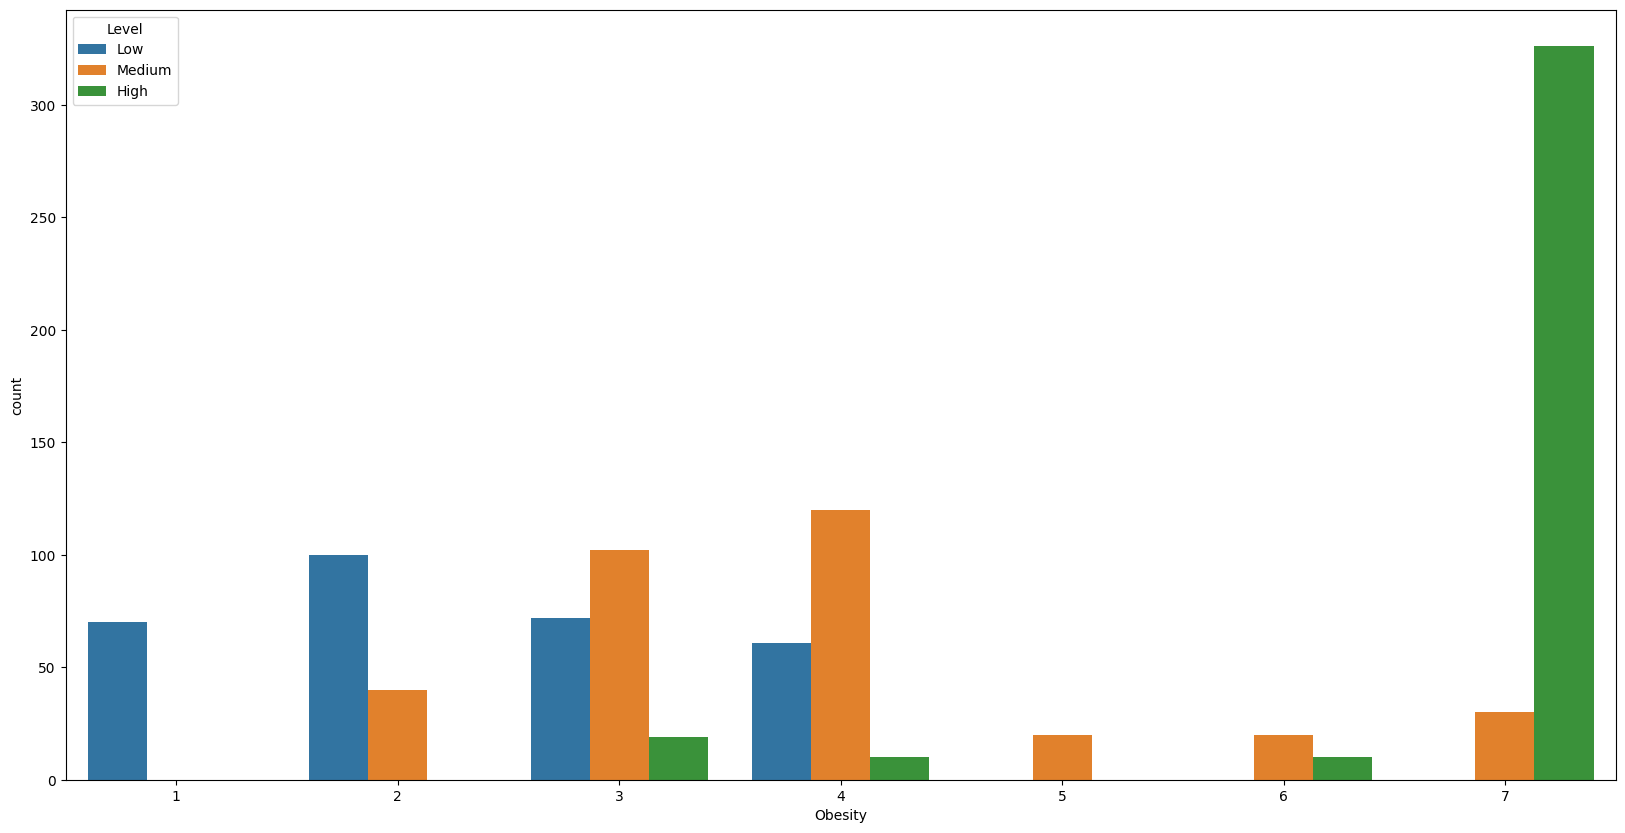

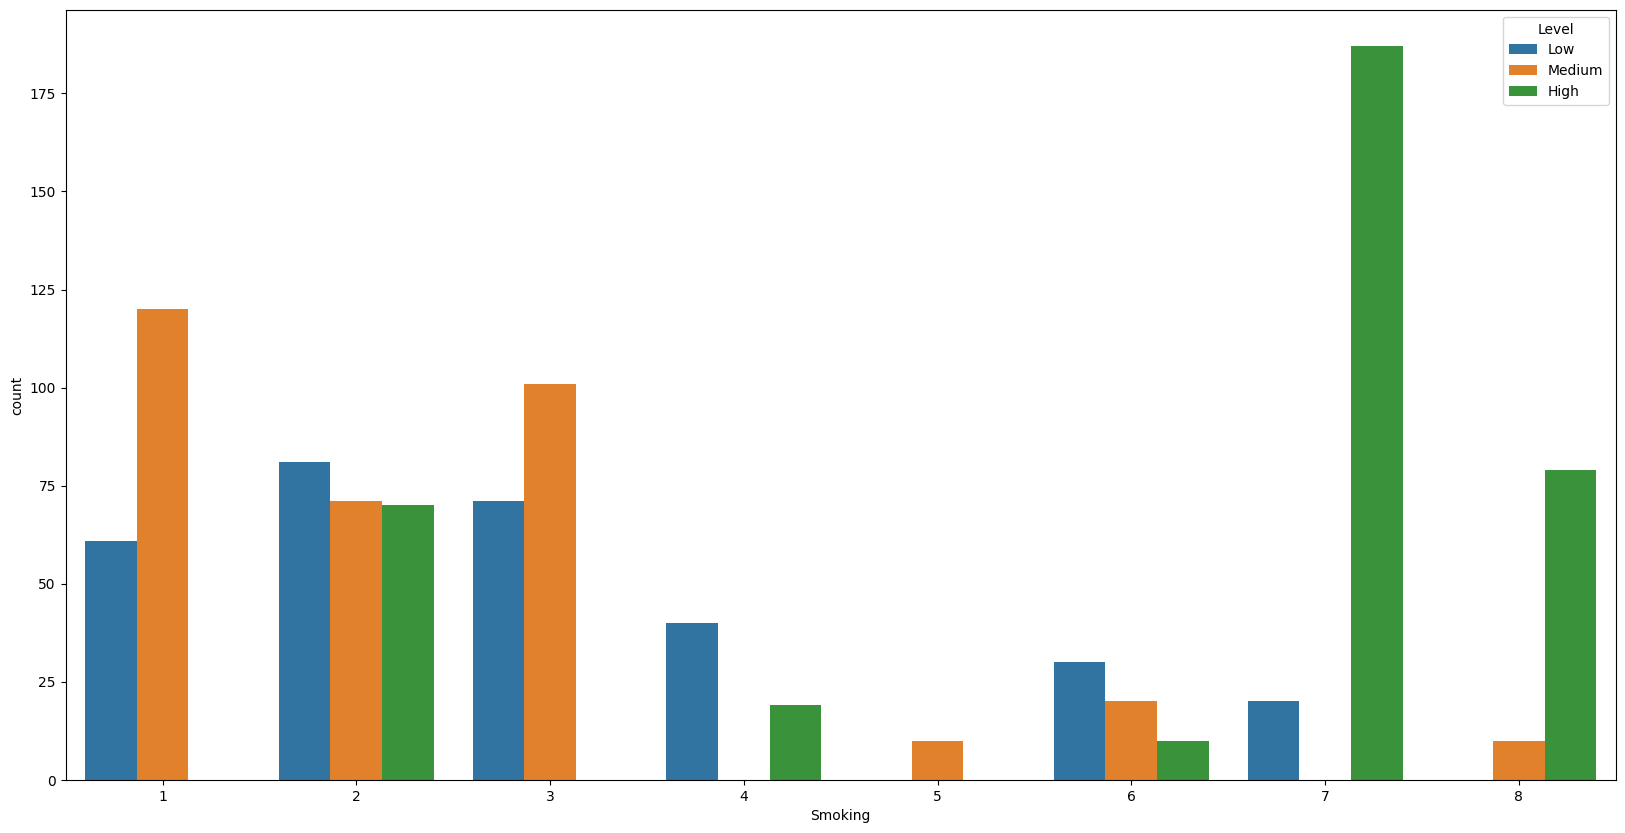

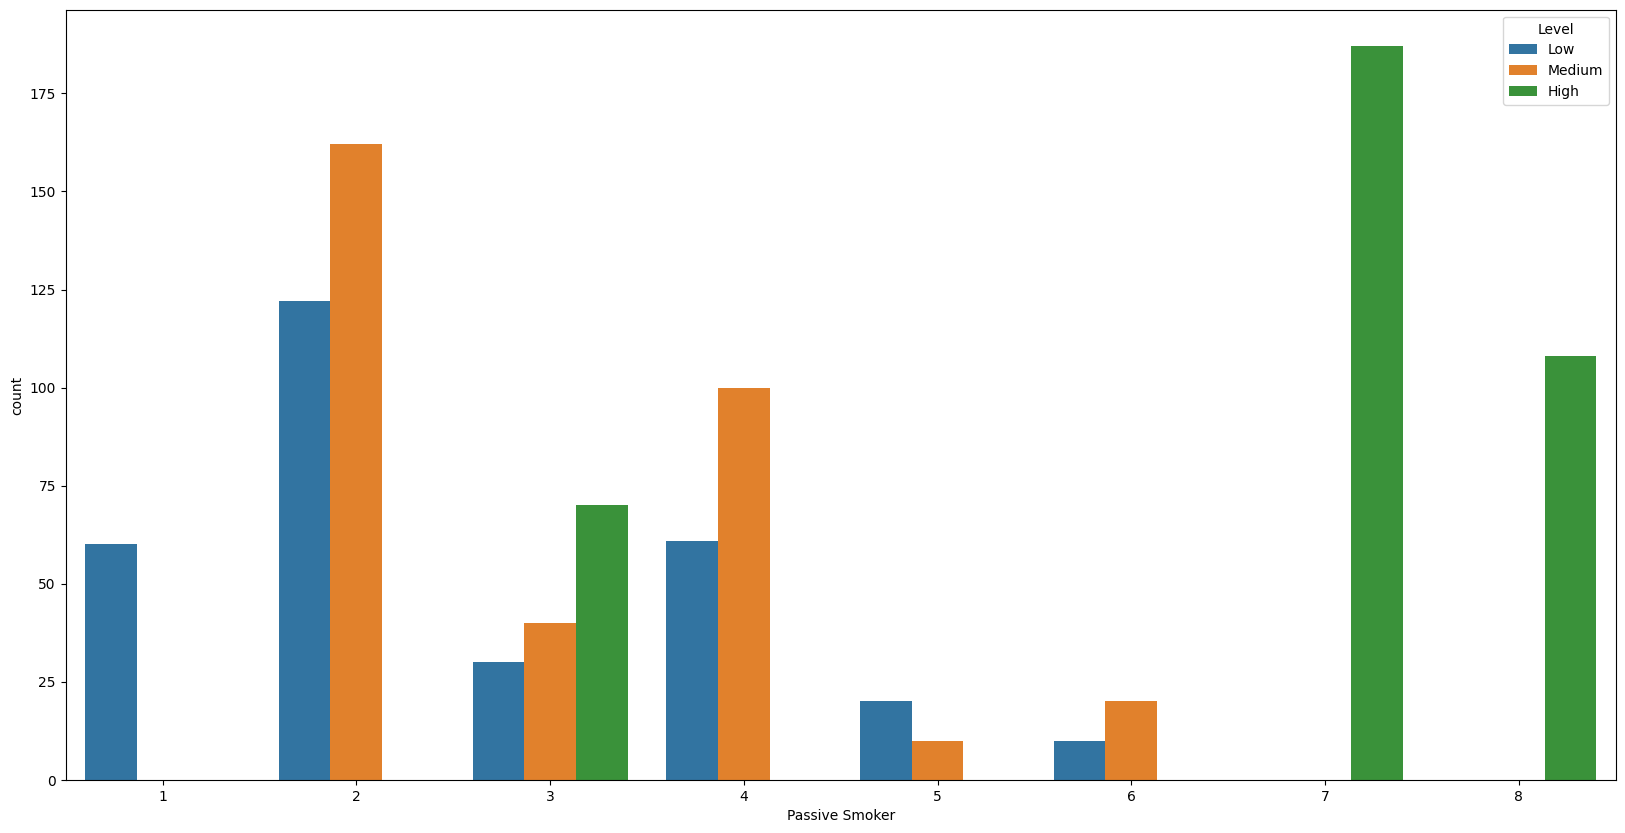

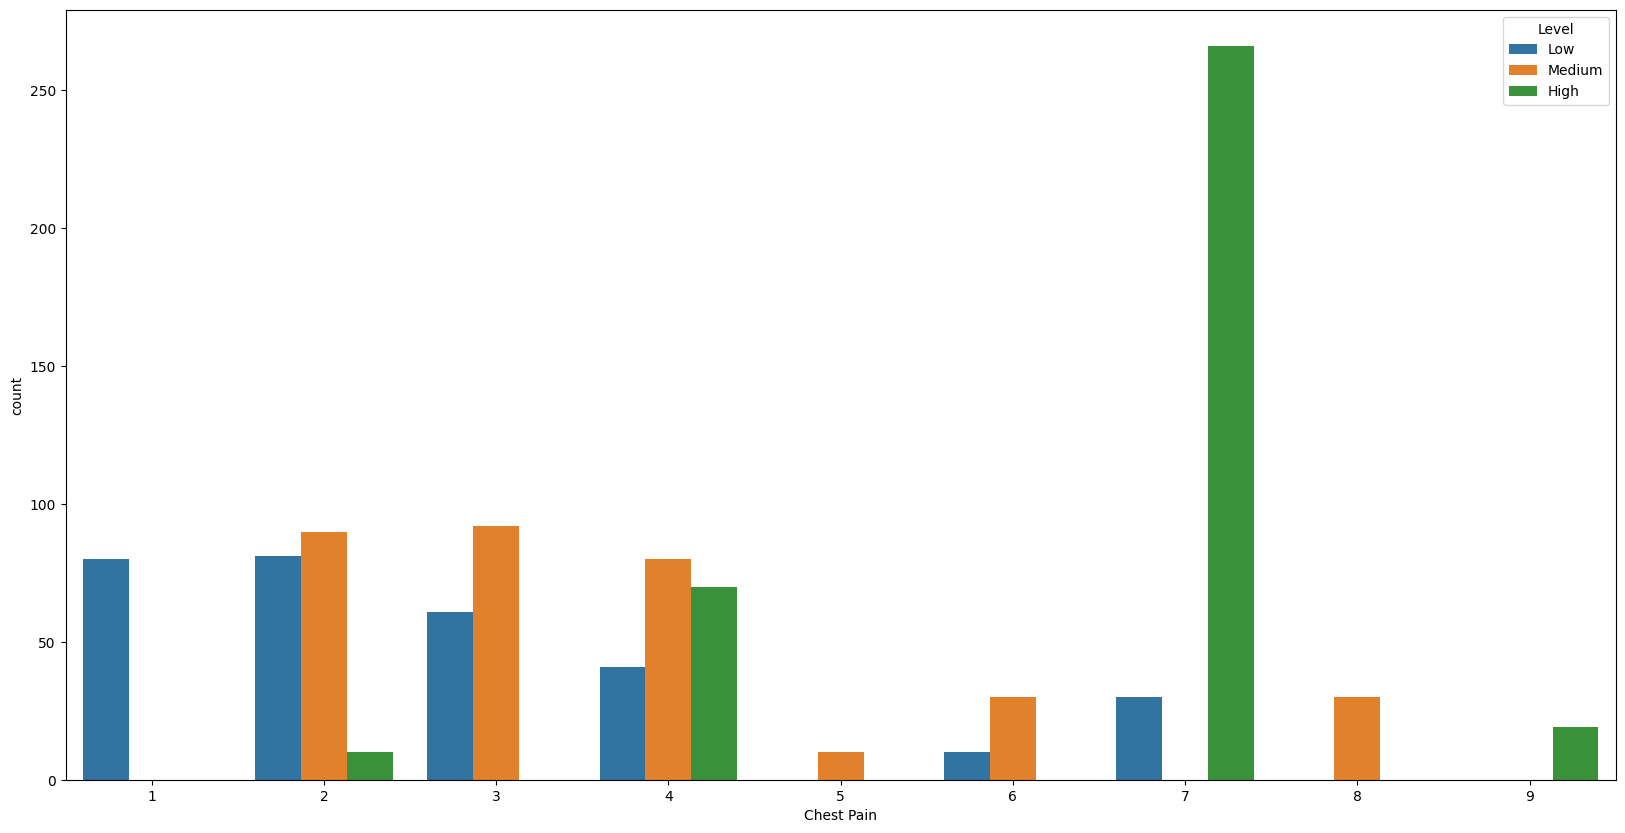

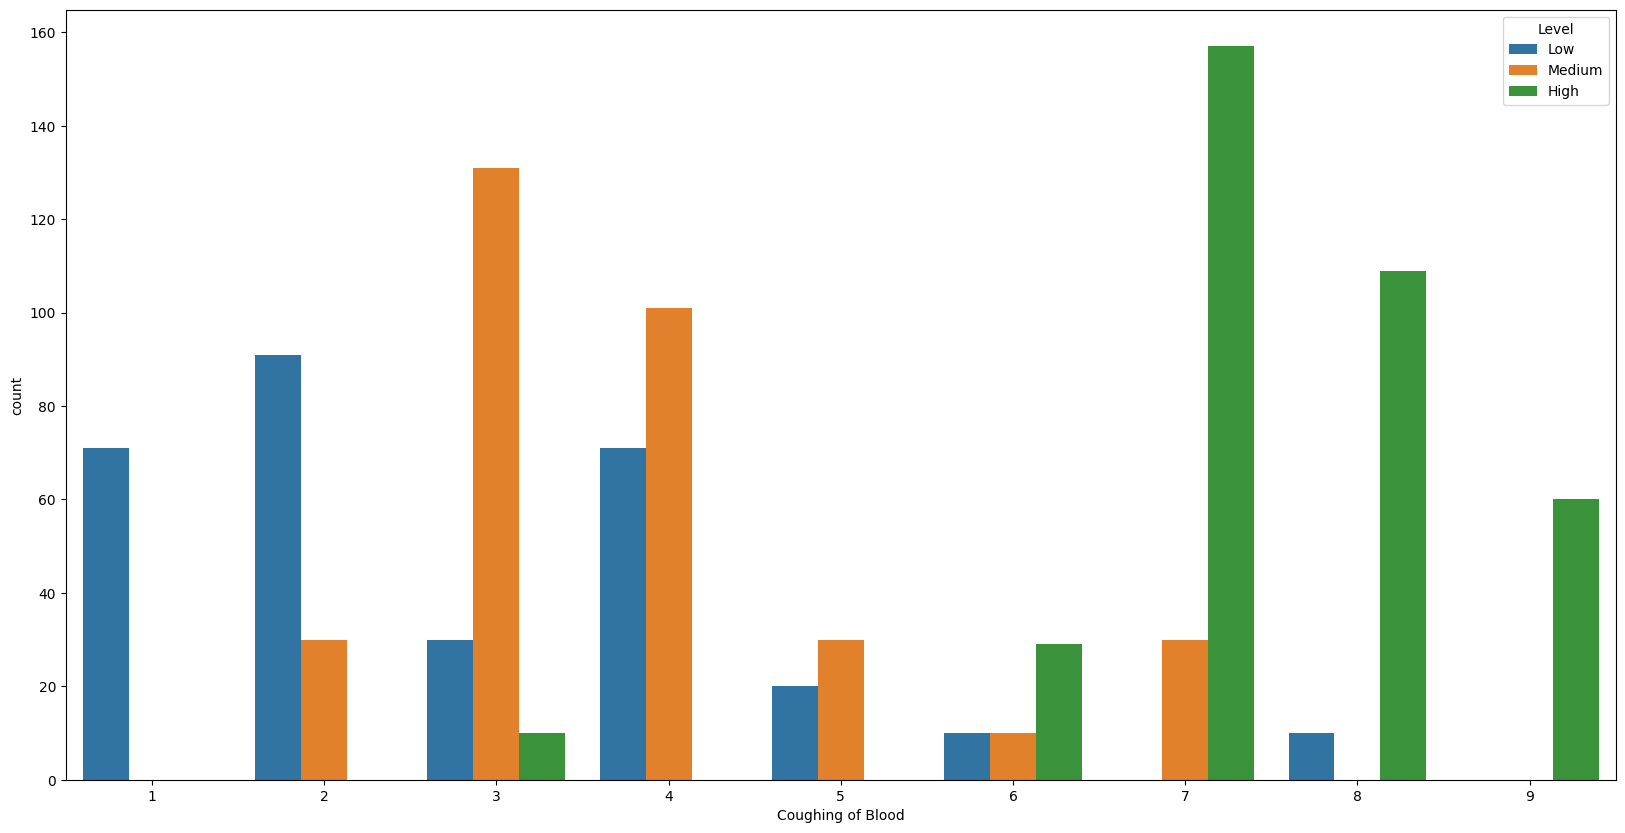

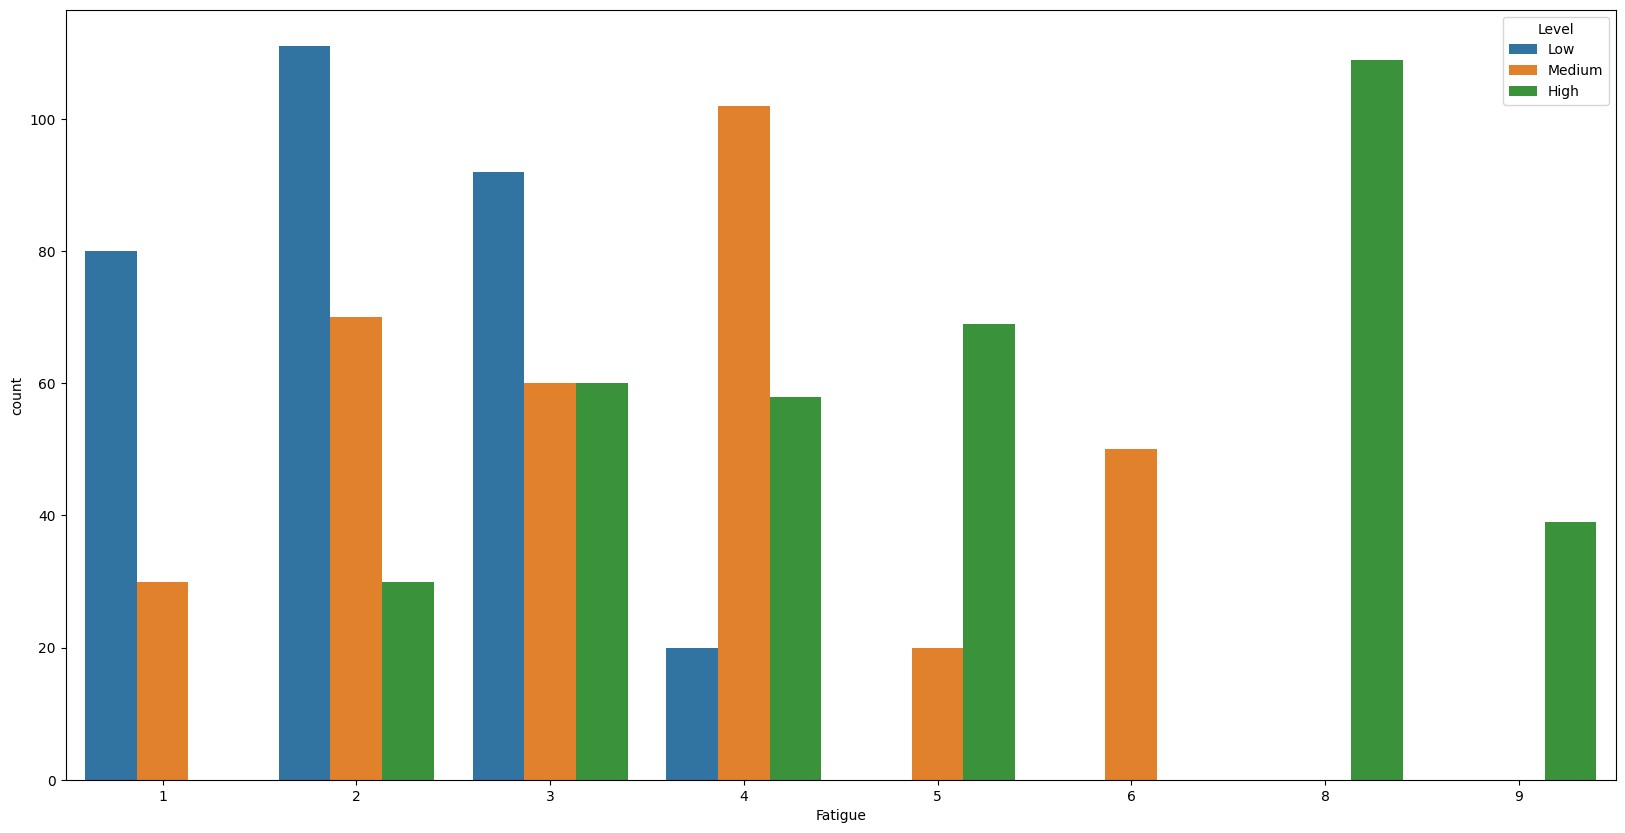

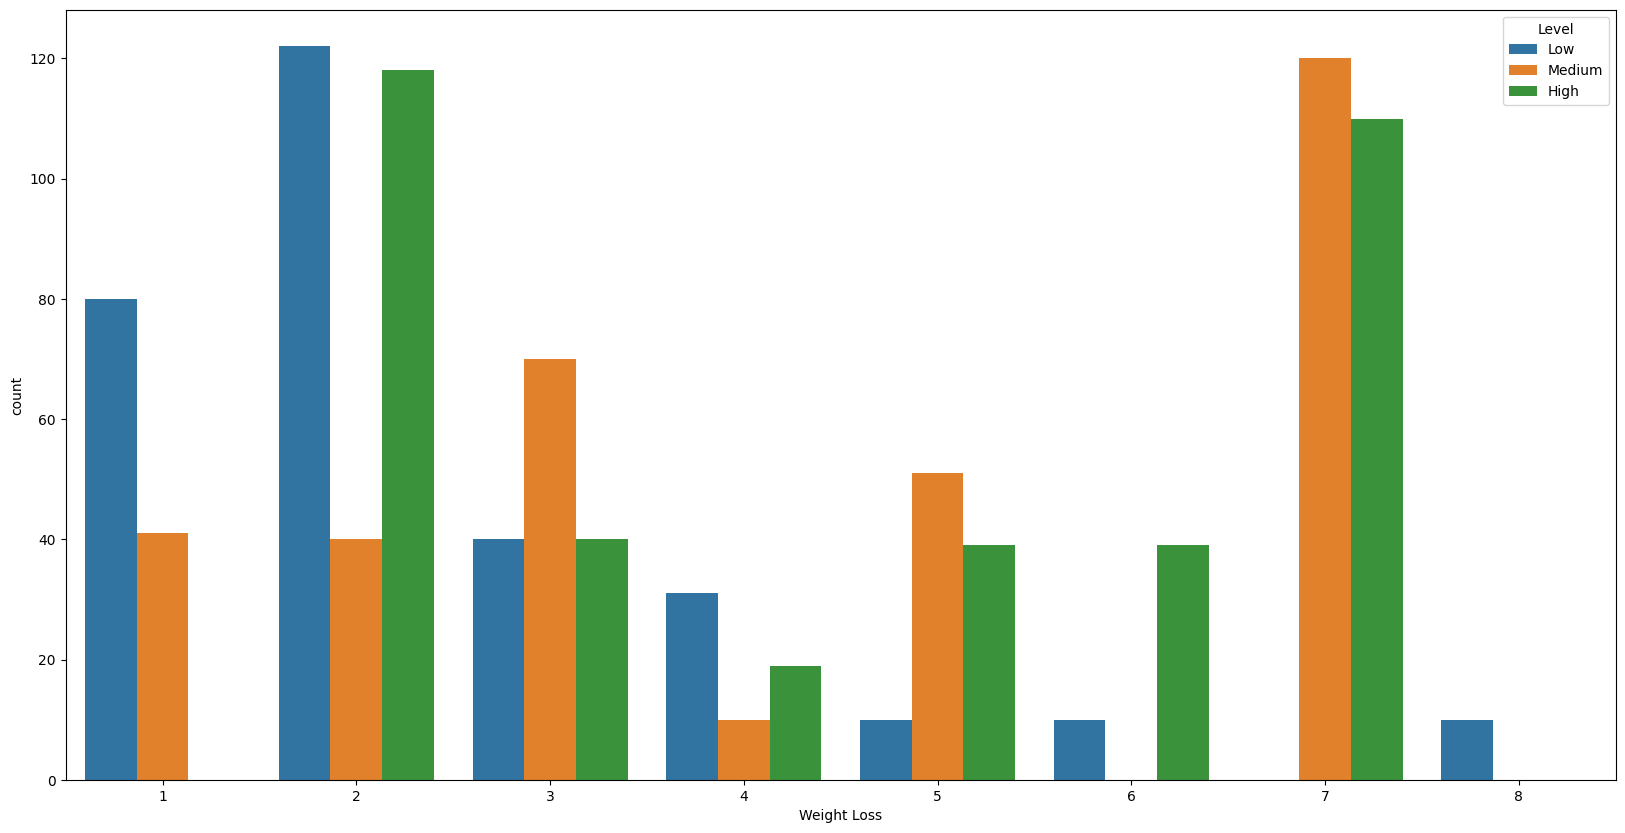

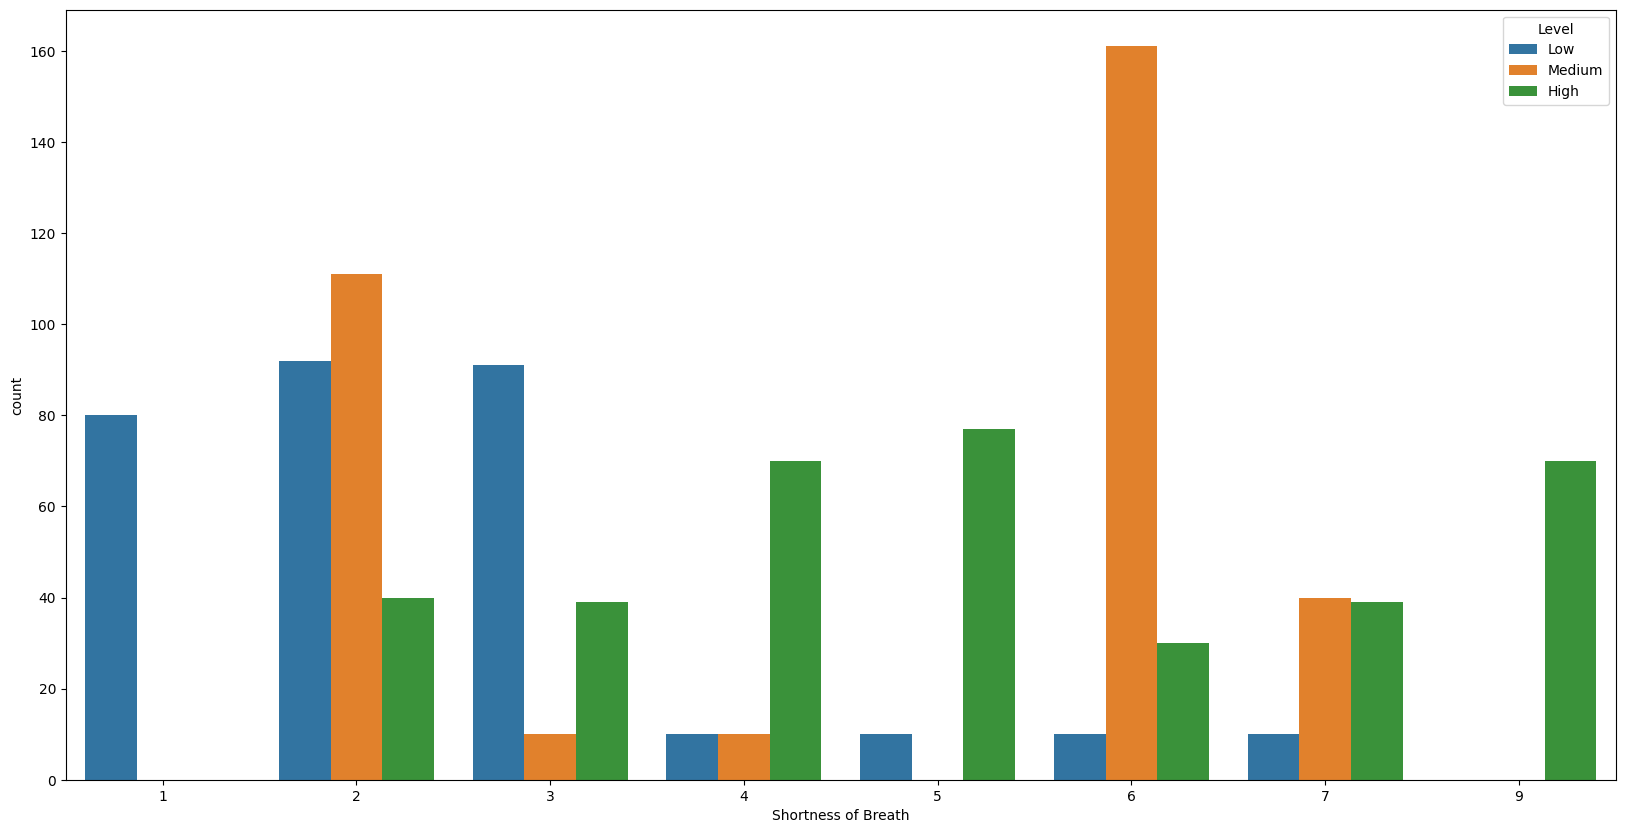

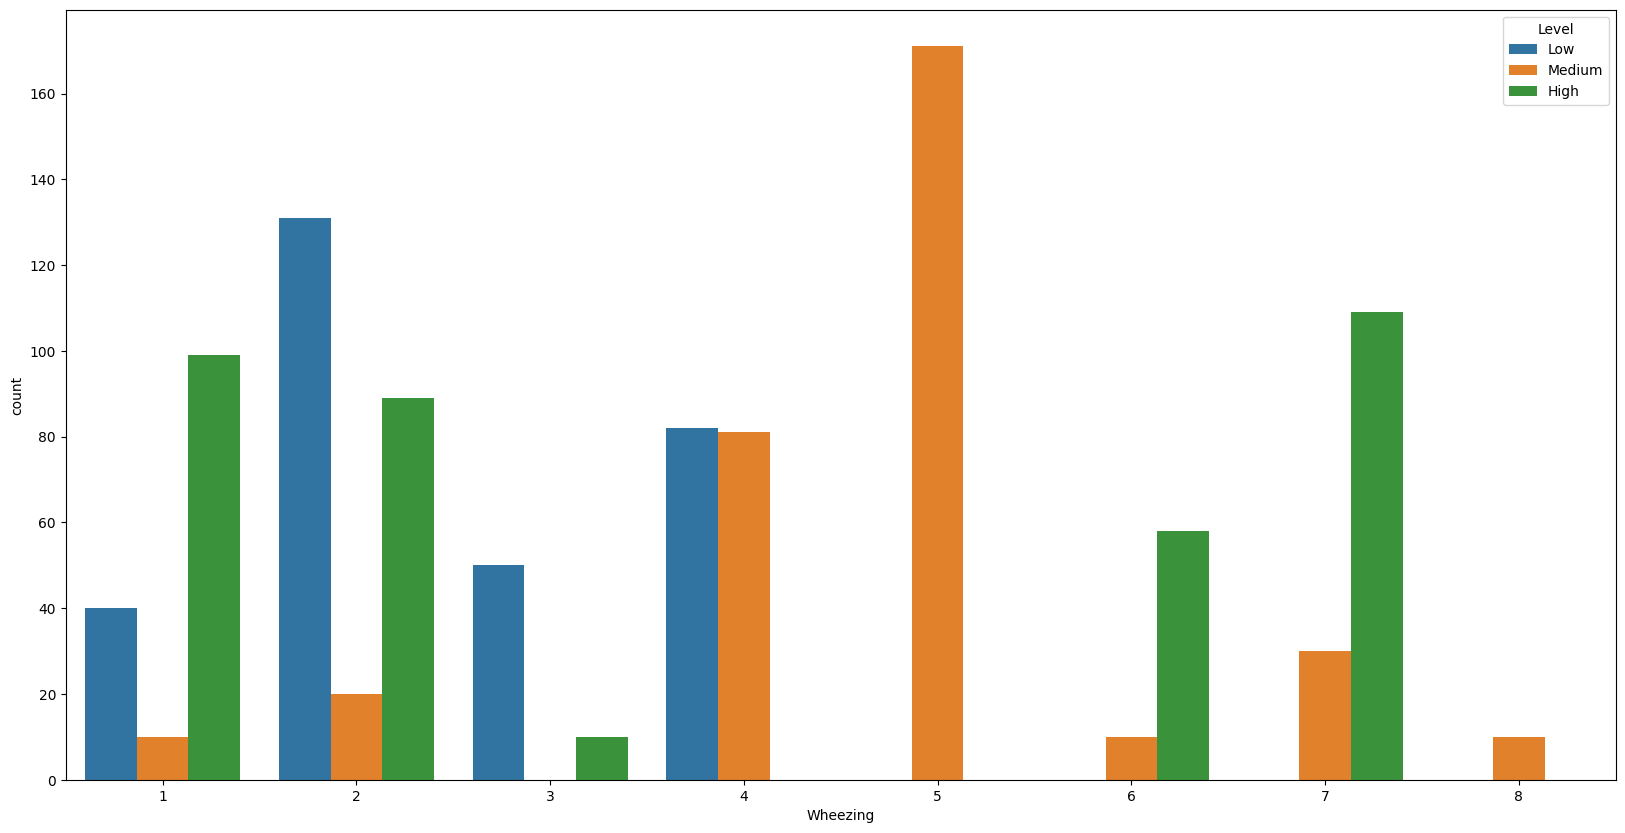

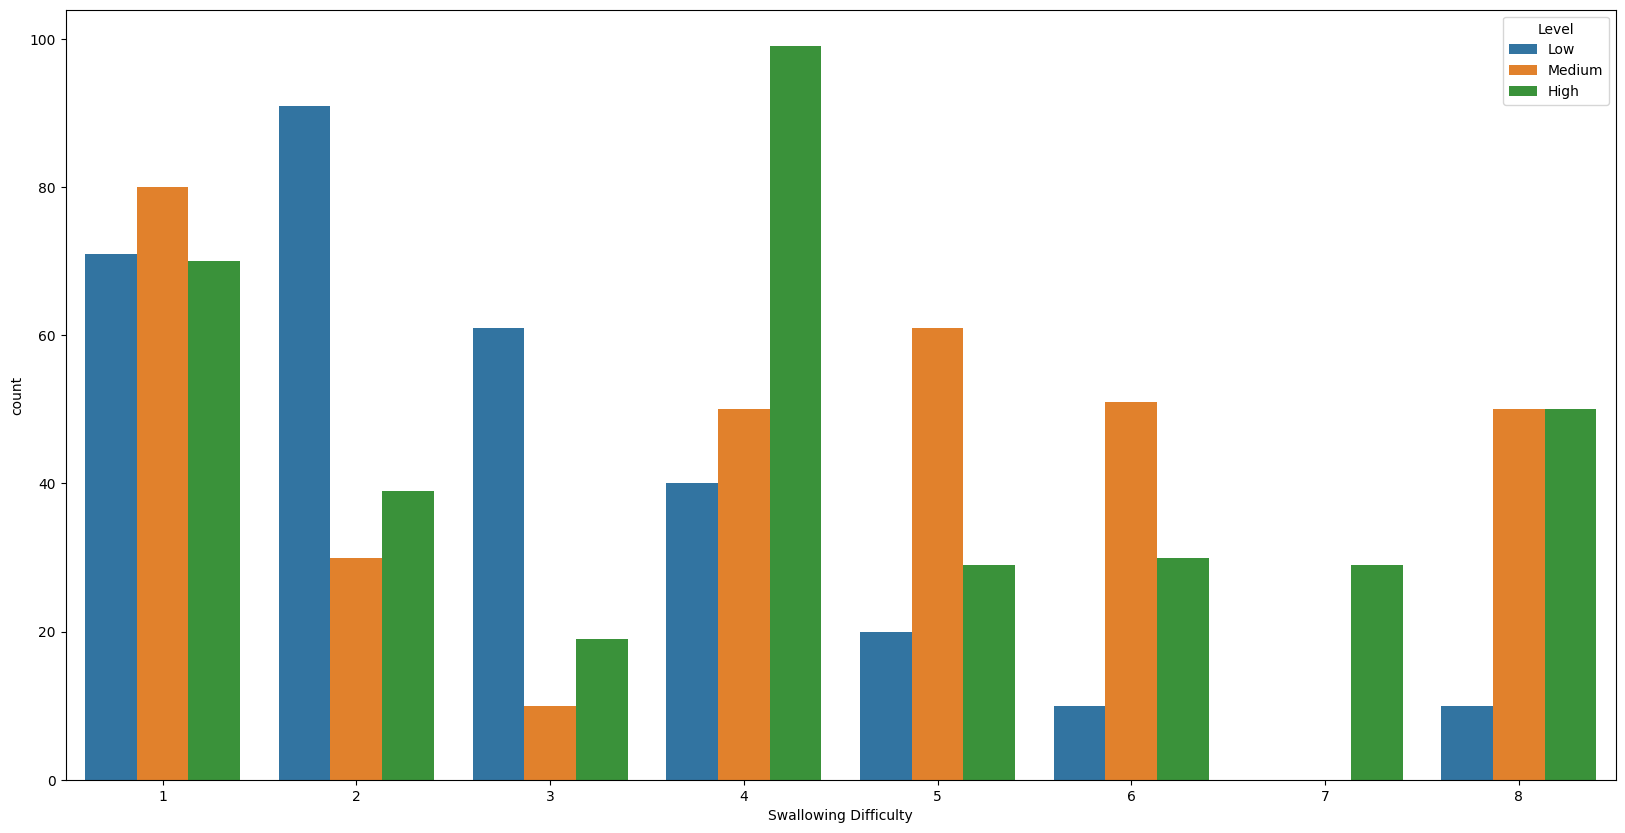

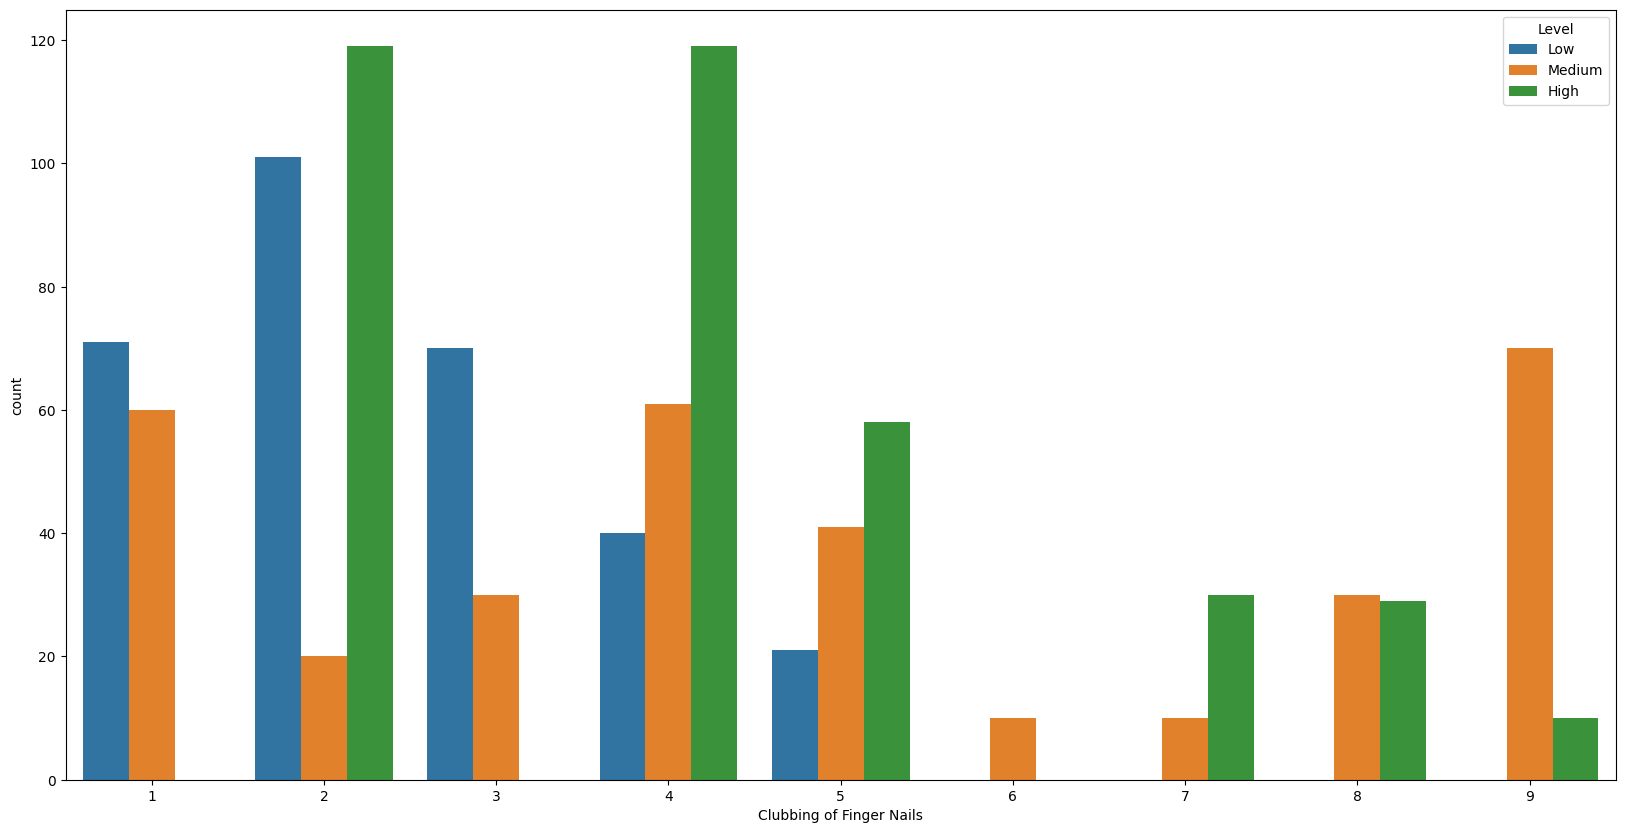

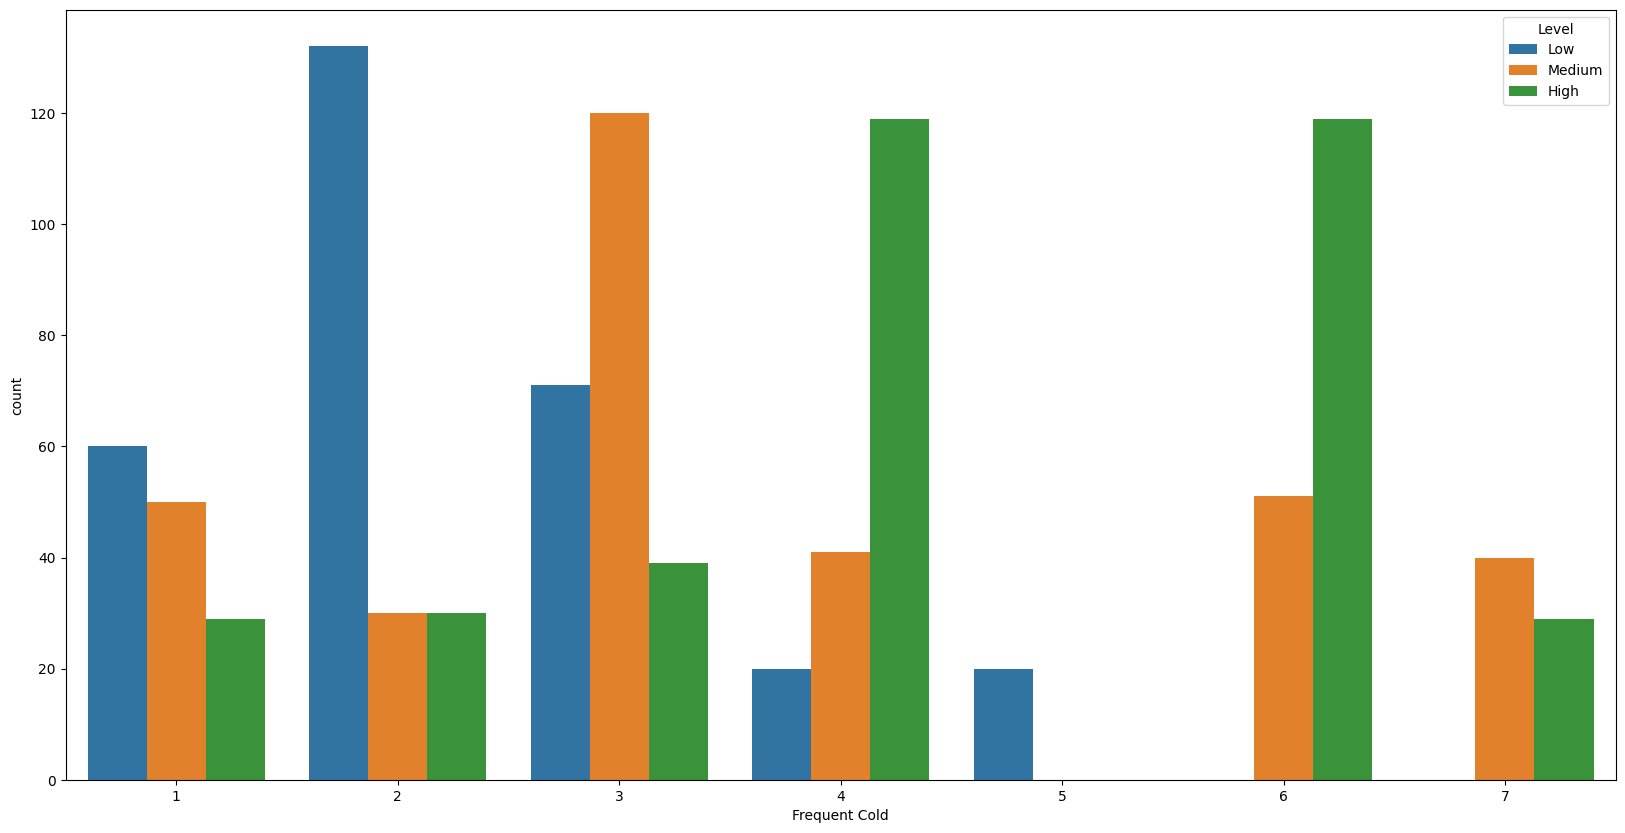

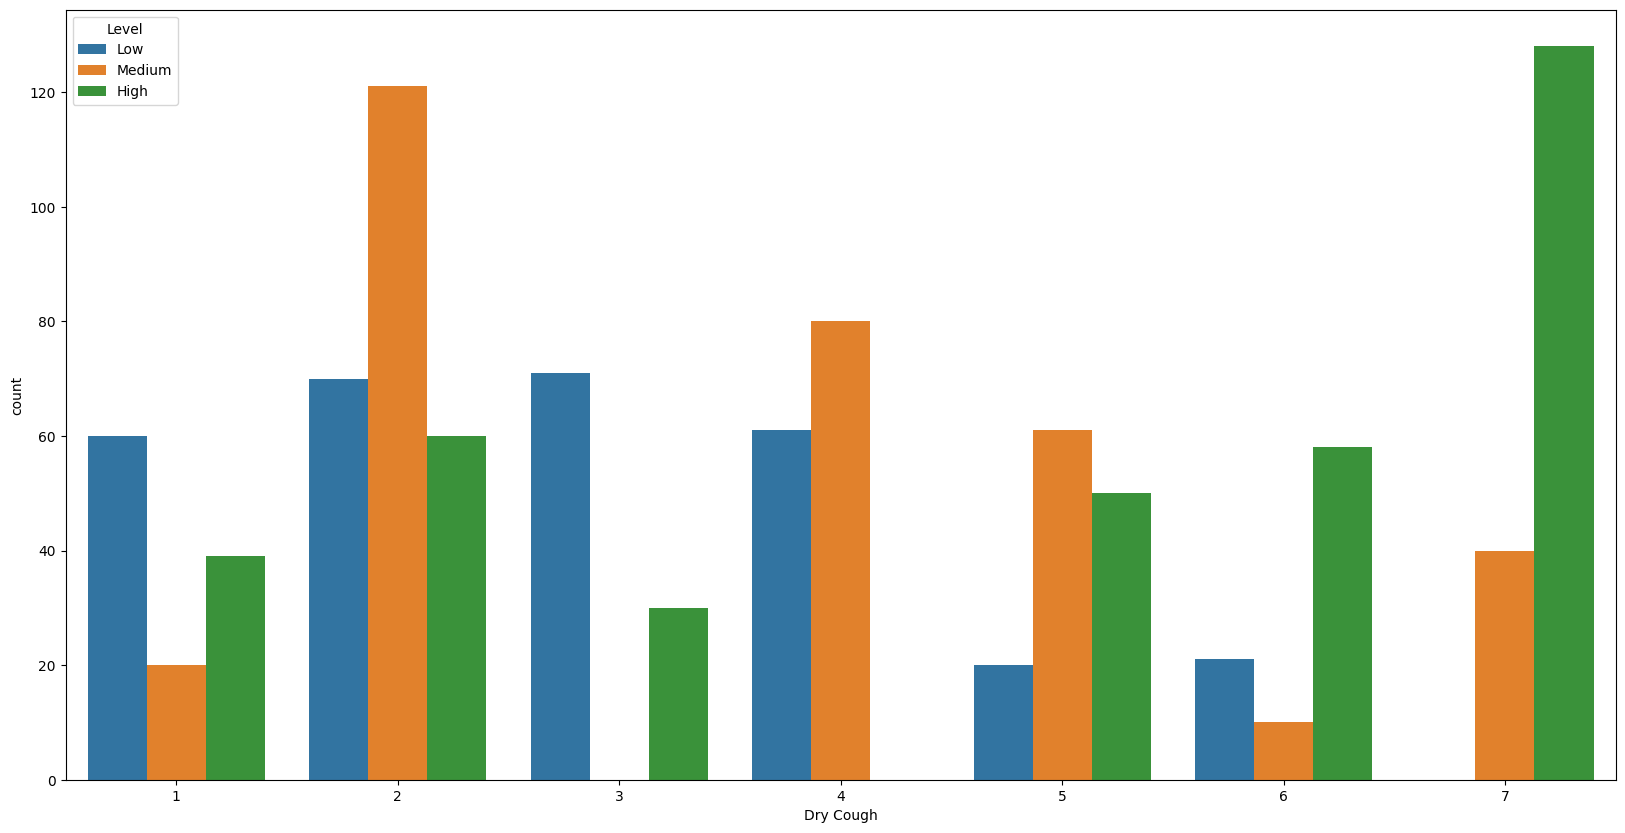

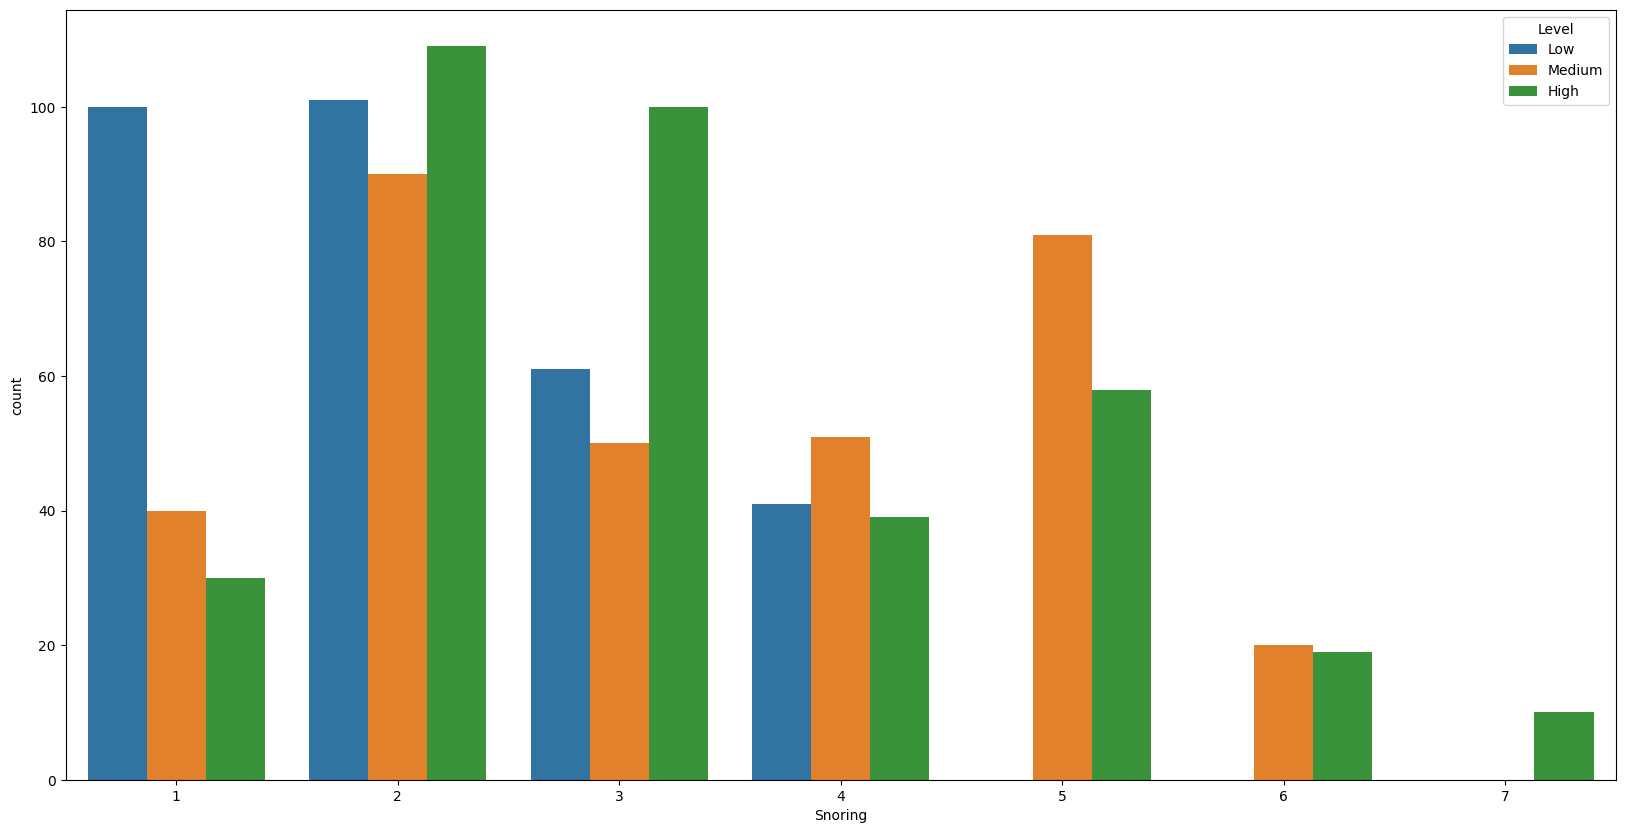

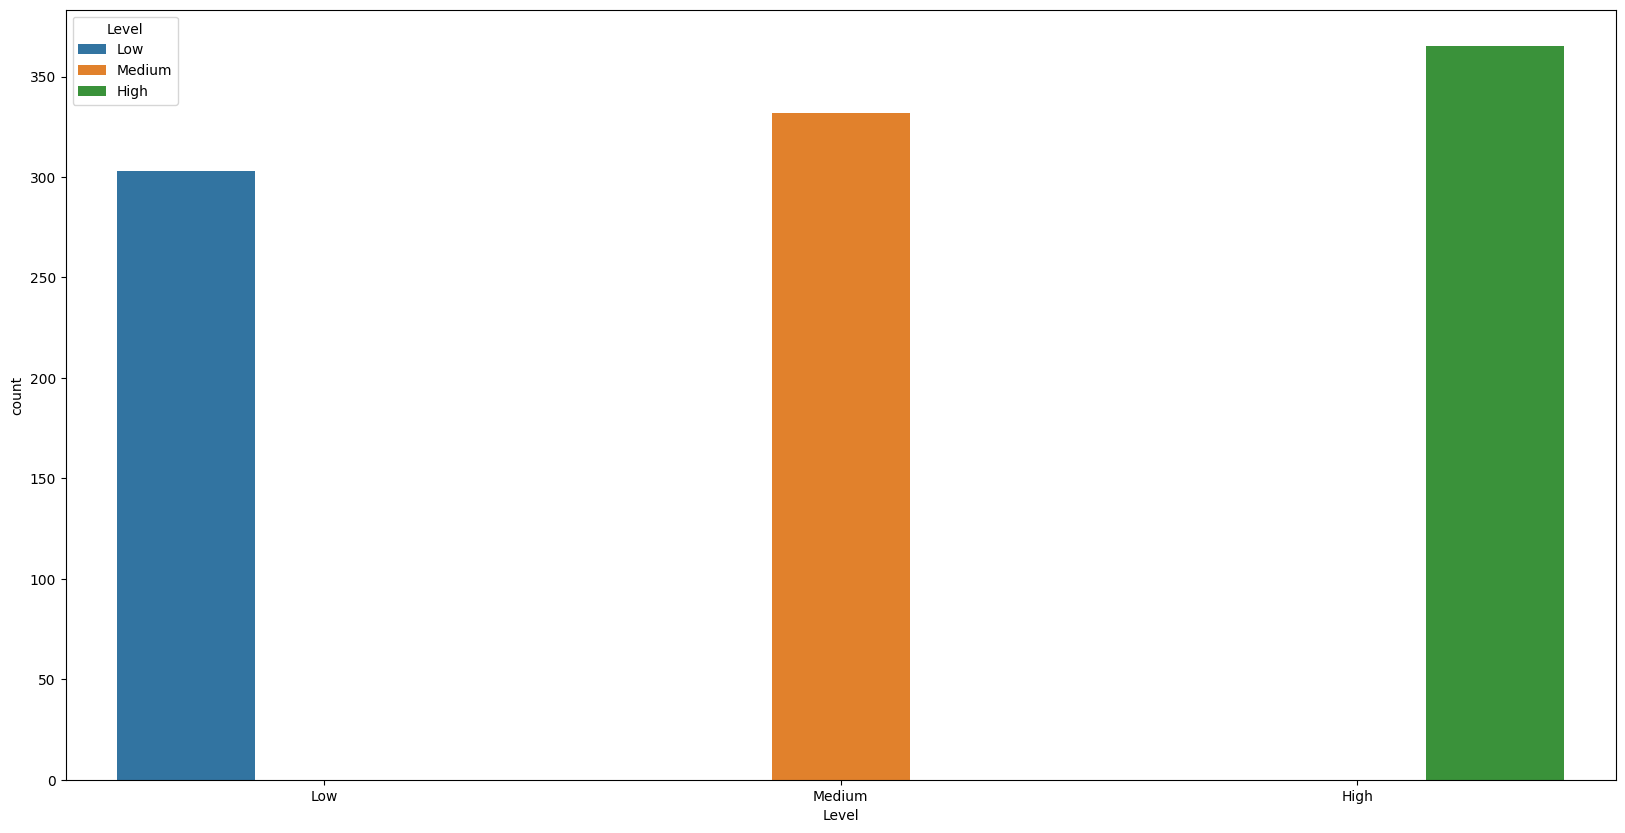

In [12]:
for i in df.columns:
    plt.figure(figsize=(20,10))
    sns.countplot(df,x=i,hue='Level')
    plt.show()

7    405
4    133
5    111
6    110
3    101
2     70
1     60
8     10
Name: Dust Allergy, dtype: int64


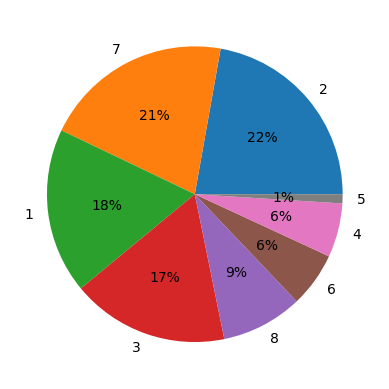

In [13]:
print(df['Dust Allergy'].value_counts())
plt.pie(df.Smoking.value_counts(),labels=df.Smoking.value_counts().index,autopct='%.0f%%')
plt.show()

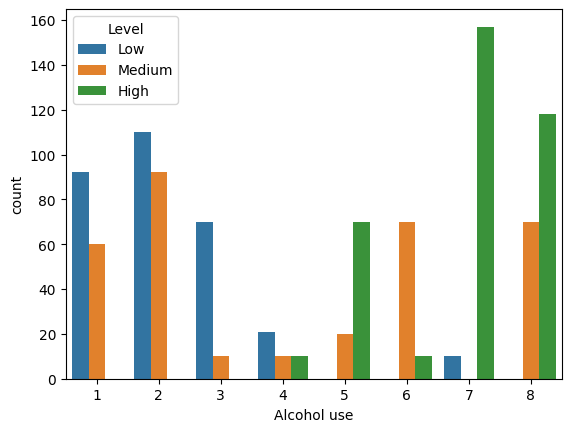

In [14]:
sns.countplot(x="Alcohol use", hue="Level", data=df)
plt.show()

<Axes: xlabel='Obesity', ylabel='count'>

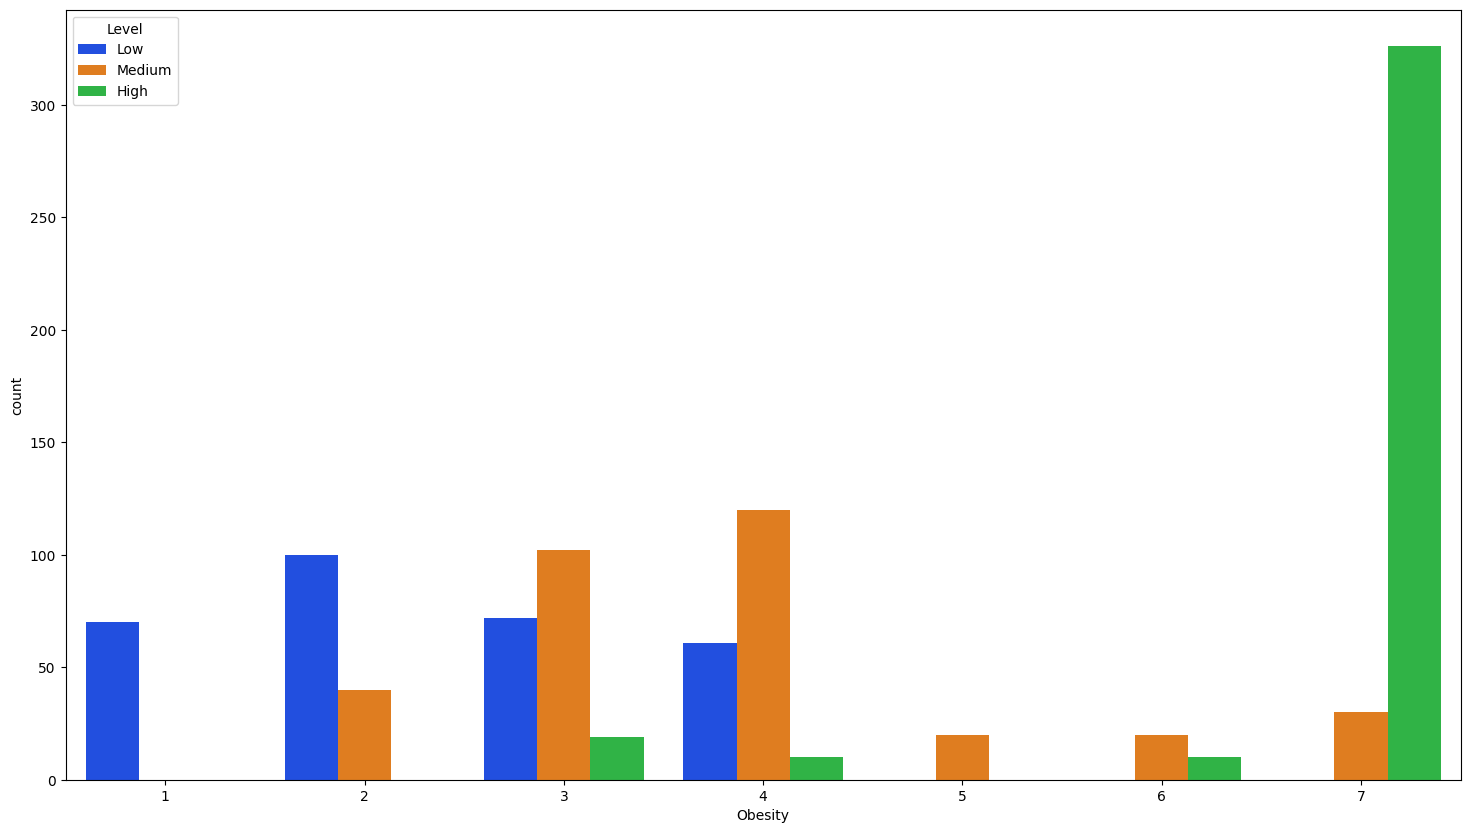

In [15]:
plt.figure(figsize=(18,10))
sns.countplot(x='Obesity',data=df,hue = 'Level', palette='bright')

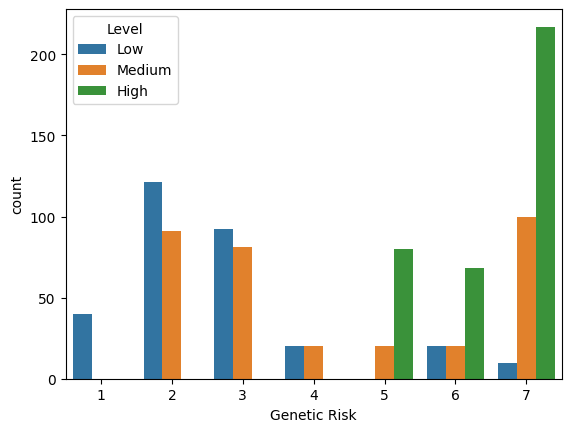

In [16]:
sns.countplot(x="Genetic Risk", hue="Level", data=df)
plt.show()

# Preprocessing

In [17]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [18]:
df['Level'] = encode.fit_transform(df['Level'])

In [19]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,1
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,2
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,0
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,0
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,0


In [20]:
df = df.drop(columns=['index', 'Patient Id'])

In [21]:
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,0
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,0
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,0


# modeling

In [22]:
features = ['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring' ]
x = df[features]
y = df['Level']
x.shape, y.shape

((1000, 20), (1000,))

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

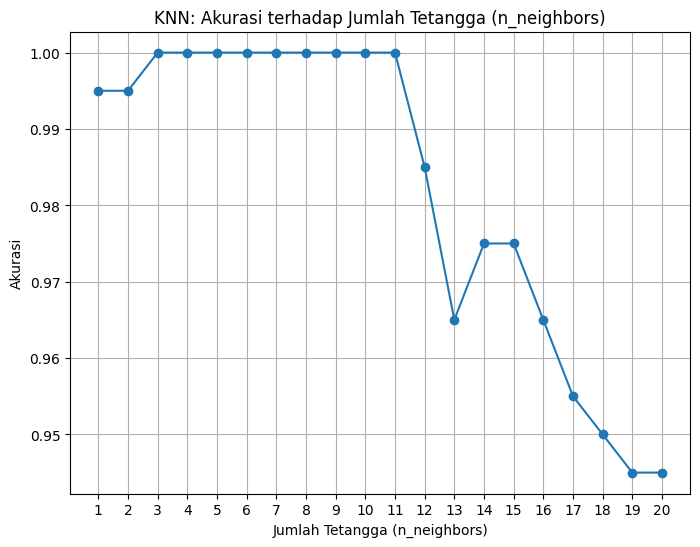

In [24]:
accuracies = []

neighbors = range(1, 21)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    acc_knn = accuracy_score(y_test, y_pred)
    accuracies.append(acc_knn)

plt.figure(figsize=(8, 6))
plt.plot(neighbors, accuracies, marker='o')
plt.title('KNN: Akurasi terhadap Jumlah Tetangga (n_neighbors)')
plt.xlabel('Jumlah Tetangga (n_neighbors)')
plt.ylabel('Akurasi')
plt.xticks(np.arange(1, 21, step=1))
plt.grid(True)
plt.show()

In [25]:
input_data = np.array([[33, 1, 2, 4, 5, 4, 3, 2, 2, 4, 4, 3, 4, 2, 2, 3, 1, 2, 3, 4]])



prediction = knn.predict(input_data)
print('Jika Low 1 Medium 2 dan High 0.')
print('Estimasi pasien lung cancer dengan tingkat level :', prediction)

Jika Low 1 Medium 2 dan High 0.
Estimasi pasien lung cancer dengan tingkat level : [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = accuracy_score(y_test, y_pred)
print("Metode K-Nearst Neighboard")
print("Test set accuracy: {:.2f}".format(acc_knn))
print(f"Test set accuracy: {acc_knn}")

Metode K-Nearst Neighboard
Test set accuracy: 1.00
Test set accuracy: 1.0


# Visualisasi hasil algoritma

In [28]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[76  0  0]
 [ 0 62  0]
 [ 0  0 62]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        62

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Text(95.72222222222221, 0.5, 'Actual')

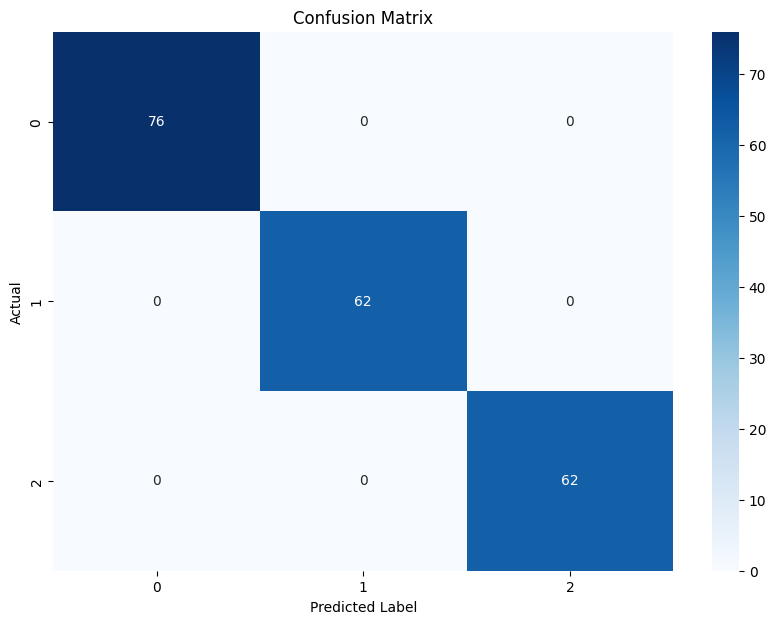

In [29]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual')

# save model (pickle)

In [30]:
import pickle

filename = 'kanker-paru-paru.sav'
pickle.dump (knn, open(filename, 'wb'))